### 주의 : 본 코드는 책에 대한 학습 및 교육외에 배포를 금지합니다.
### Warning: This code is prohibited from distribution except for learning and educational purposes related to the book.
3장 머신러닝과 화학특성
- by Keunhong Jeong

![image.png](attachment:image.png)

In [1]:
import requests

# Updated URL to point to the new file location
url = 'https://raw.githubusercontent.com/doas1min/CAIP/main/data/Lipophilicity_G2.csv'
response = requests.get(url)

# 파일을 저장합니다.
with open('Lipophilicity_test.csv', 'wb') as f:
    f.write(response.content)

In [2]:
import pandas as pd

# CSV 파일 읽기
data = pd.read_csv('Lipophilicity_test.csv')

# index 변경
data.set_index(['smiles', 'logD'], inplace=True)
data.index.names = ['SMILES', 'Lipophilicity']

# CSV 파일로 저장
data.to_csv('Lipophilicity.csv')


In [3]:
!pip install rdkit

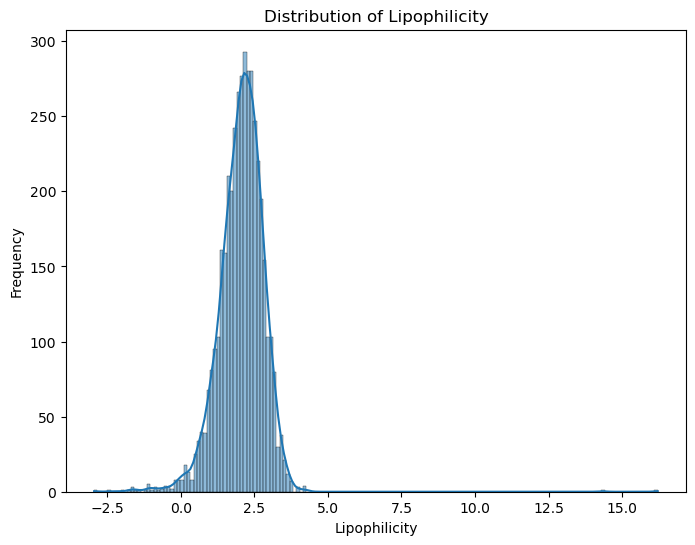

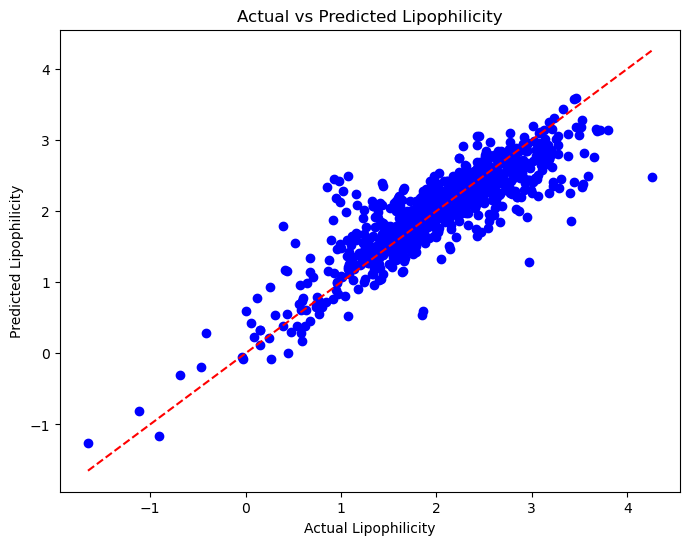

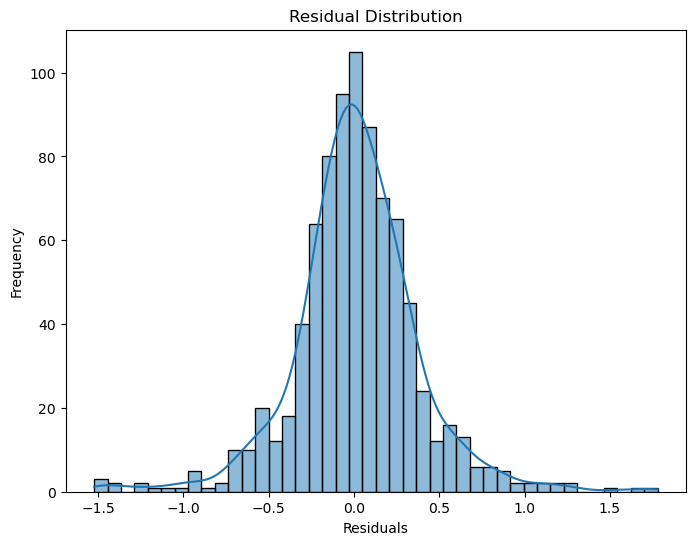

Mean Squared Error: 0.1346915371696352
Mean Absolute Error: 0.2580159251996196
R2 Score: 0.7600734617135674


In [5]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np

# 데이터 불러오기
data = pd.read_csv("Lipophilicity.csv")

# SMILES -> Mol 변환을 먼저 해두고 (실패하면 None)
data["Mol"] = data["SMILES"].apply(Chem.MolFromSmiles)

# 파싱 실패(None)인 행은 descriptor 계산이 불가하므로 제거
data = data.dropna(subset=["Mol"]).reset_index(drop=True)

# Descriptor 추출 (Mol을 사용)
data['TPSA'] = data['Mol'].apply(lambda m: Descriptors.TPSA(m))
data['LogP'] = data['Mol'].apply(lambda m: Descriptors.MolLogP(m))
data['MolecularWeight'] = data['Mol'].apply(lambda m: Descriptors.MolWt(m))
data['NumRotatableBonds'] = data['Mol'].apply(lambda m: Descriptors.NumRotatableBonds(m))

# 입력 변수와 타겟 변수 분할
X = data[['TPSA', 'LogP', 'MolecularWeight', 'NumRotatableBonds']]
y = data['Lipophilicity']

# 학습 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# PolynomialFeatures 정의 (2차 다항식으로 변환)
poly_features = PolynomialFeatures(degree=2)

# 학습 데이터에 PolynomialFeatures 적용
X_train_poly = poly_features.fit_transform(X_train)

# 다항 회귀 모델 학습
model = LinearRegression()
model.fit(X_train_poly, y_train)

# 테스트 데이터에 대해 PolynomialFeatures 적용 후 예측 수행
X_test_poly = poly_features.transform(X_test)
y_pred = model.predict(X_test_poly)

# 잔차 계산
residuals = y_test - y_pred

# 데이터 분포
plt.figure(figsize=(8, 6))
sns.histplot(data['Lipophilicity'], kde=True)
plt.xlabel('Lipophilicity')
plt.ylabel('Frequency')
plt.title('Distribution of Lipophilicity')
plt.show()

# 회귀 결과
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Lipophilicity')
plt.ylabel('Predicted Lipophilicity')
plt.title('Actual vs Predicted Lipophilicity')
plt.show()

# 잔차 분석
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residual Distribution')
plt.show()

# 평가 지표 계산
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 평가 지표 출력
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R2 Score:", r2)

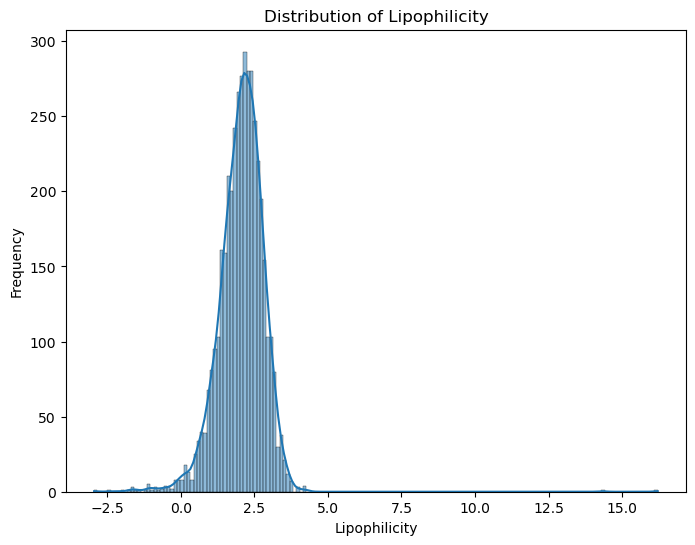

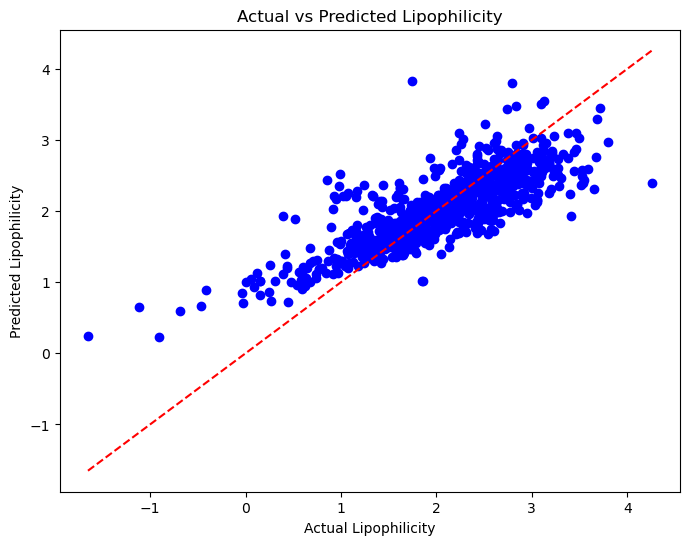

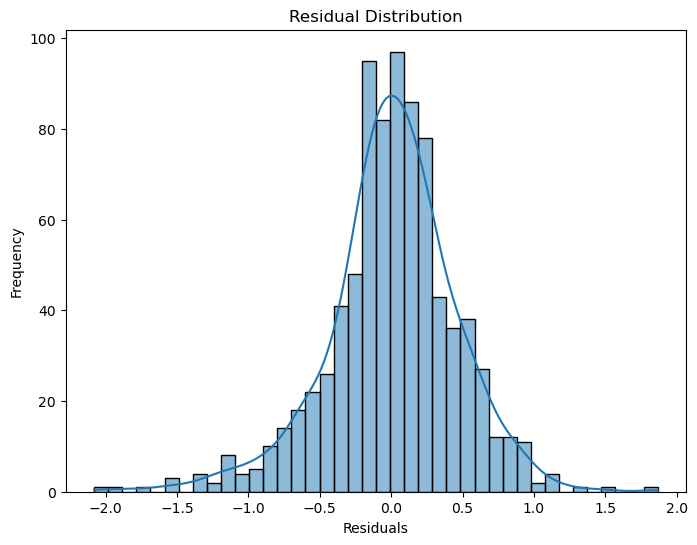

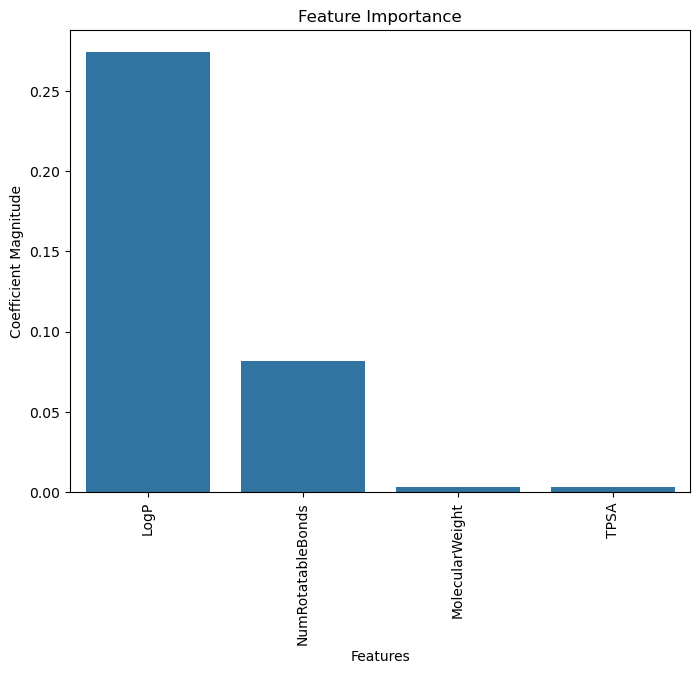

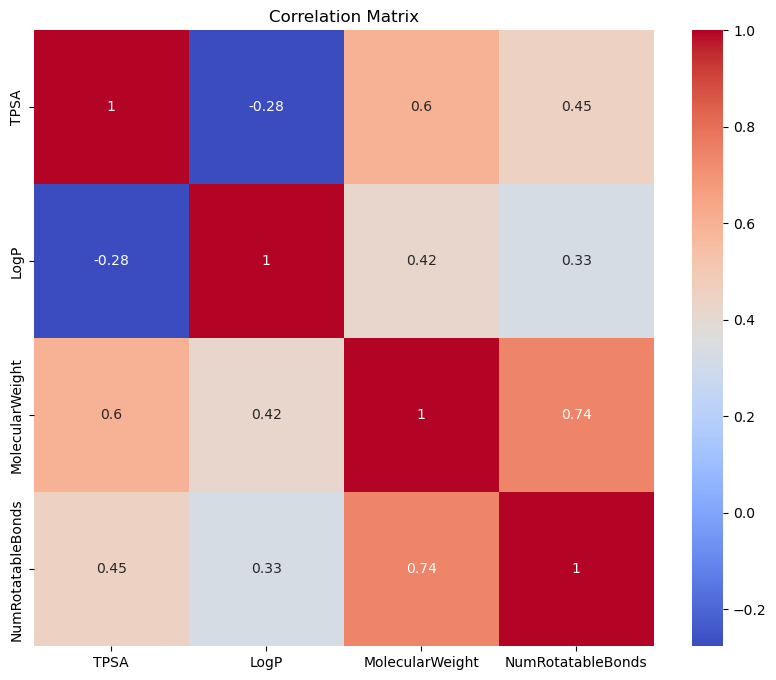

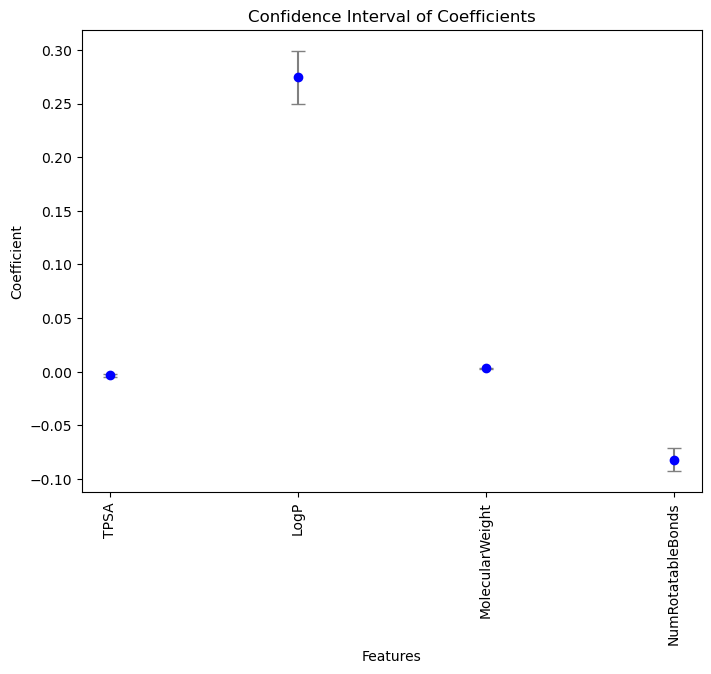

Mean Squared Error: 0.20536209784594972
Mean Absolute Error: 0.3337103439271571
R2 Score: 0.6341877279983543


In [6]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np

# 데이터 불러오기
data = pd.read_csv("Lipophilicity.csv")

# SMILES -> Mol 변환을 먼저 해두고 (실패하면 None)
data["Mol"] = data["SMILES"].apply(Chem.MolFromSmiles)

# 파싱 실패(None)인 행은 descriptor 계산이 불가하므로 제거
data = data.dropna(subset=["Mol"]).reset_index(drop=True)

# Descriptor 추출 (원래 코드와 동일한 목적, Mol을 사용)
data['TPSA'] = data['Mol'].apply(lambda m: Descriptors.TPSA(m))
data['LogP'] = data['Mol'].apply(lambda m: Descriptors.MolLogP(m))
data['MolecularWeight'] = data['Mol'].apply(lambda m: Descriptors.MolWt(m))
data['NumRotatableBonds'] = data['Mol'].apply(lambda m: Descriptors.NumRotatableBonds(m))

# Lipophilicity2.csv로 저장
data.to_csv("Lipophilicity2.csv", index=False)

# 입력 변수와 타겟 변수 분할
X = data[['TPSA', 'LogP', 'MolecularWeight', 'NumRotatableBonds']]
y = data['Lipophilicity']

# 학습 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ridge 회귀 모델 학습
model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측 수행
y_pred = model.predict(X_test)

# 잔차 계산
residuals = y_test - y_pred

# 데이터 분포
plt.figure(figsize=(8, 6))
sns.histplot(data['Lipophilicity'], kde=True)
plt.xlabel('Lipophilicity')
plt.ylabel('Frequency')
plt.title('Distribution of Lipophilicity')
plt.show()

# 회귀 결과
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Lipophilicity')
plt.ylabel('Predicted Lipophilicity')
plt.title('Actual vs Predicted Lipophilicity')
plt.show()

# 잔차 분석
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residual Distribution')
plt.show()

# 변수 중요도
coefs = pd.Series(model.coef_, index=X.columns)
sorted_coefs = coefs.abs().sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x=sorted_coefs.index, y=sorted_coefs.values)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Coefficient Magnitude')
plt.title('Feature Importance')
plt.show()

# 다중공선성 분석
corr_matrix = X.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 회귀 계수 신뢰 구간 계산
X_train = sm.add_constant(X_train)
model_with_const = sm.OLS(y_train, X_train).fit()
coef_conf_int = model_with_const.conf_int()

plt.figure(figsize=(8, 6))
plt.errorbar(range(len(coefs)), coefs.values, yerr=np.abs(coef_conf_int.iloc[1:, :].values.T - coefs.values),
             fmt='o', color='blue', ecolor='gray', capsize=5)
plt.xticks(range(len(coefs)), coefs.index, rotation=90)
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.title('Confidence Interval of Coefficients')
plt.show()

# 평가 지표 계산
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 평가 지표 출력
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R2 Score:", r2)

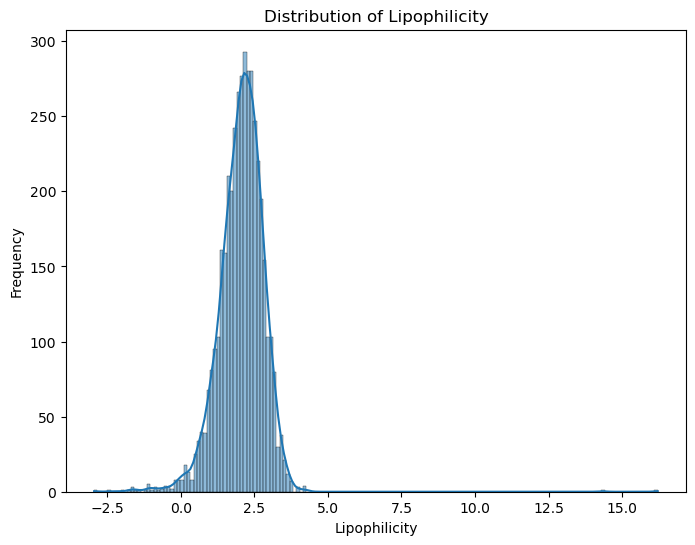

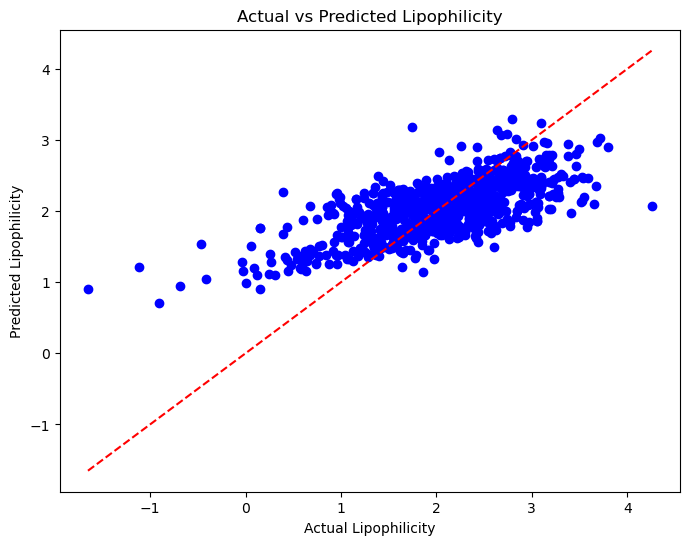

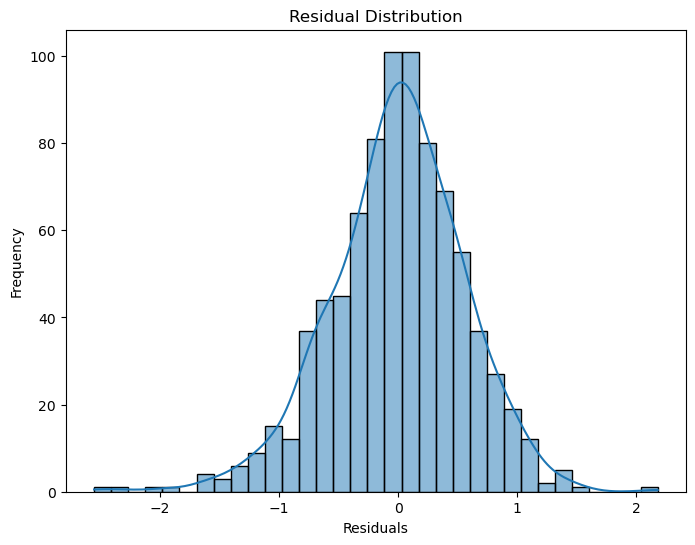

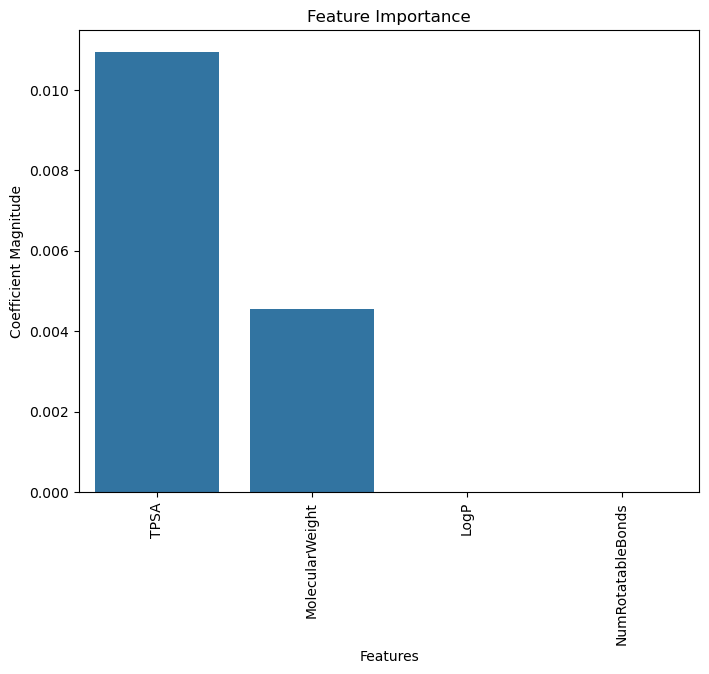

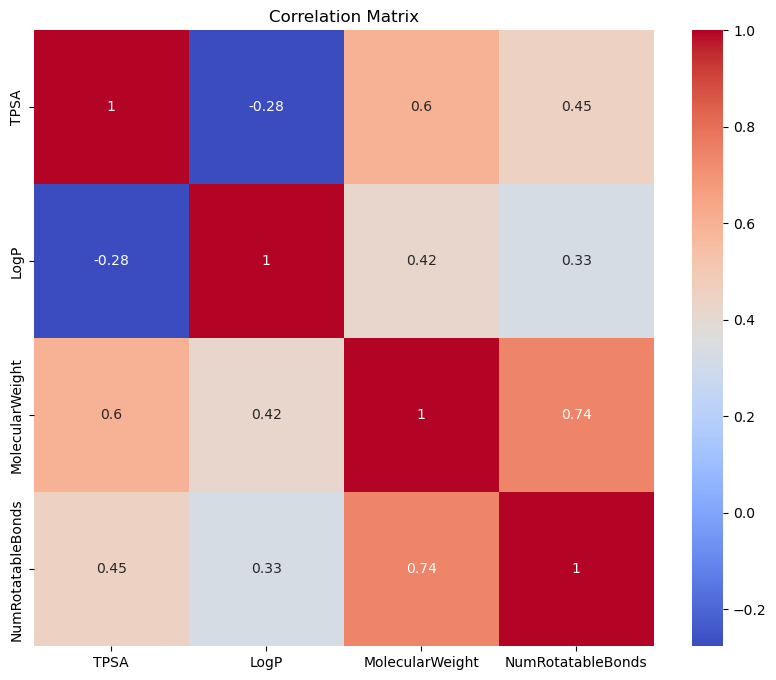

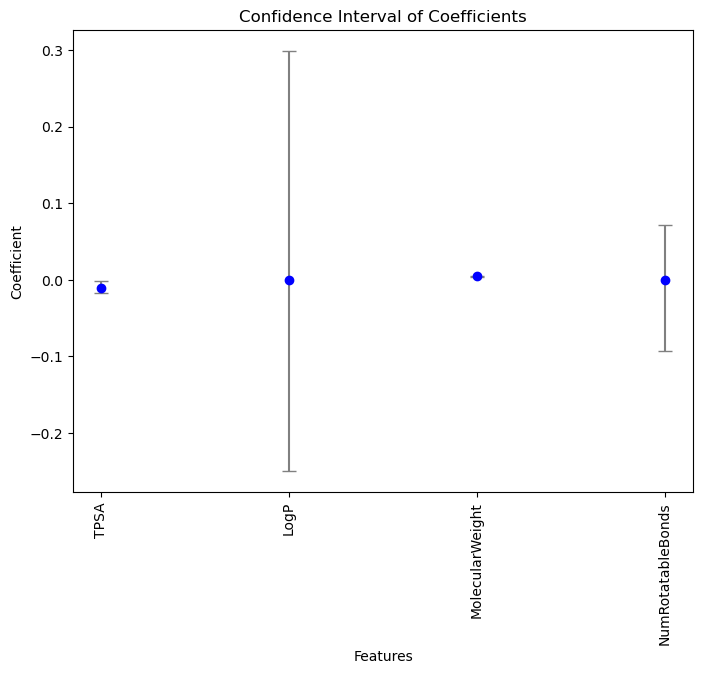

Mean Squared Error: 0.31446093215059717
Mean Absolute Error: 0.4302758258524038
R2 Score: 0.4398495669241914


In [ ]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np

# 데이터 불러오기
data = pd.read_csv("Lipophilicity.csv")

# SMILES -> Mol 변환을 먼저 해두고 (실패하면 None)
data["Mol"] = data["SMILES"].apply(Chem.MolFromSmiles)

# 파싱 실패(None)인 행은 descriptor 계산이 불가하므로 제거
data = data.dropna(subset=["Mol"]).reset_index(drop=True)

# Descriptor 추출 (원래 코드와 동일한 목적, Mol을 사용)
data['TPSA'] = data['Mol'].apply(lambda m: Descriptors.TPSA(m))
data['LogP'] = data['Mol'].apply(lambda m: Descriptors.MolLogP(m))
data['MolecularWeight'] = data['Mol'].apply(lambda m: Descriptors.MolWt(m))
data['NumRotatableBonds'] = data['Mol'].apply(lambda m: Descriptors.NumRotatableBonds(m))

# Lipophilicity2.csv로 저장
data.to_csv("Lipophilicity2.csv", index=False)

# 입력 변수와 타겟 변수 분할
X = data[['TPSA', 'LogP', 'MolecularWeight', 'NumRotatableBonds']]
y = data['Lipophilicity']

# 학습 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lasso 회귀 모델 학습
model = Lasso(alpha=1.0)
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측 수행
y_pred = model.predict(X_test)

# 잔차 계산
residuals = y_test - y_pred

# 데이터 분포
plt.figure(figsize=(8, 6))
sns.histplot(data['Lipophilicity'], kde=True)
plt.xlabel('Lipophilicity')
plt.ylabel('Frequency')
plt.title('Distribution of Lipophilicity')
plt.show()

# 회귀 결과
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Lipophilicity')
plt.ylabel('Predicted Lipophilicity')
plt.title('Actual vs Predicted Lipophilicity')
plt.show()

# 잔차 분석
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residual Distribution')
plt.show()

# 변수 중요도
coefs = pd.Series(model.coef_, index=X.columns)
sorted_coefs = coefs.abs().sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x=sorted_coefs.index, y=sorted_coefs.values)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Coefficient Magnitude')
plt.title('Feature Importance')
plt.show()

# 다중공선성 분석
corr_matrix = X.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 회귀 계수 신뢰 구간 계산
X_train = sm.add_constant(X_train)
model_with_const = sm.OLS(y_train, X_train).fit()
coef_conf_int = model_with_const.conf_int()

plt.figure(figsize=(8, 6))
plt.errorbar(range(len(coefs)), coefs.values, yerr=np.abs(coef_conf_int.iloc[1:, :].values.T - coefs.values),
             fmt='o', color='blue', ecolor='gray', capsize=5)
plt.xticks(range(len(coefs)), coefs.index, rotation=90)
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.title('Confidence Interval of Coefficients')
plt.show()

# 평가 지표 계산
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 평가 지표 출력
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R2 Score:", r2)

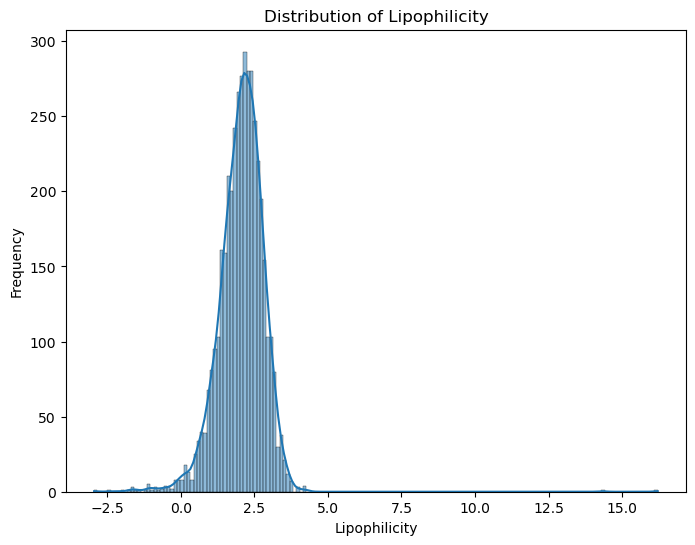

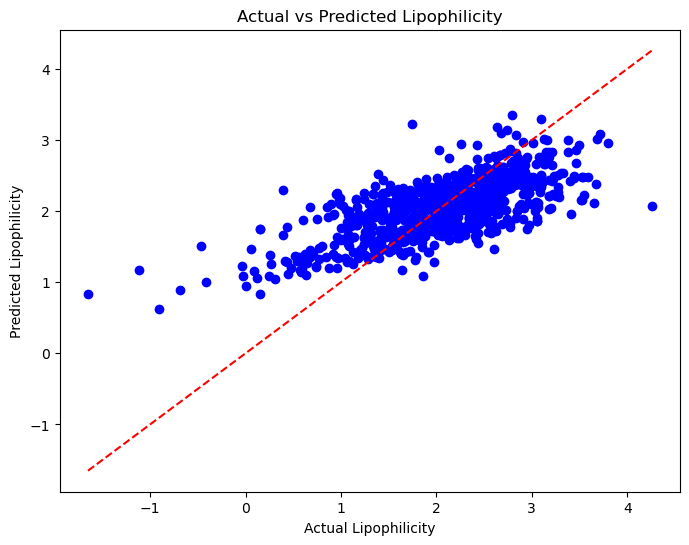

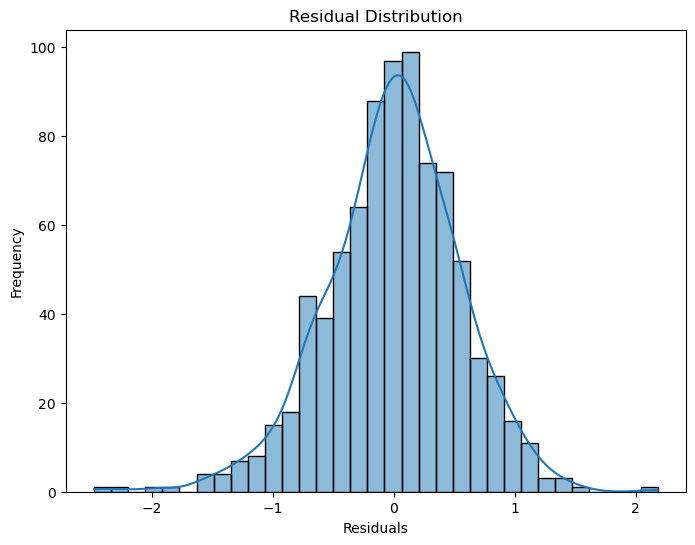

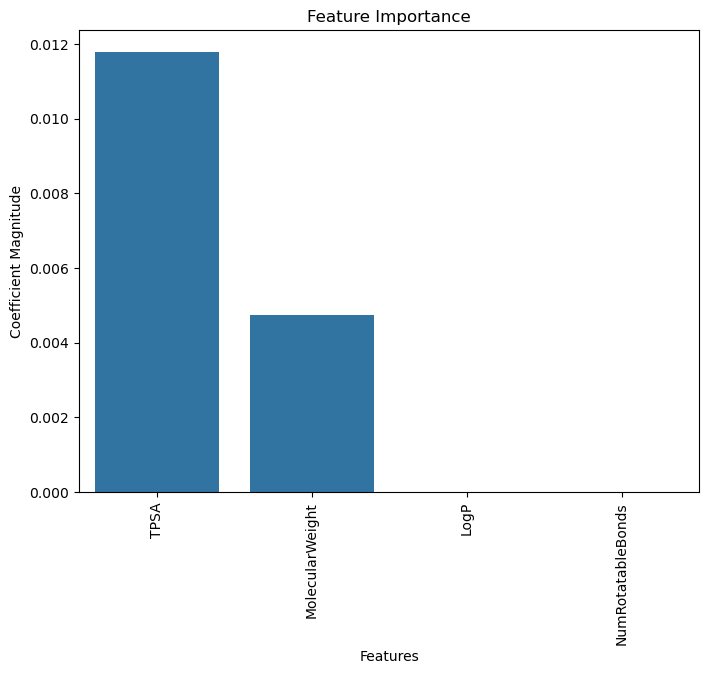

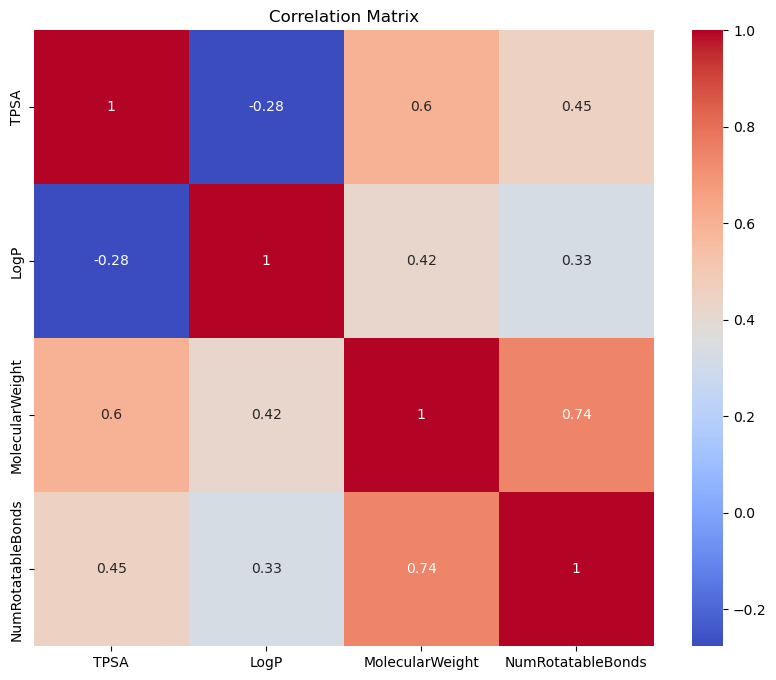

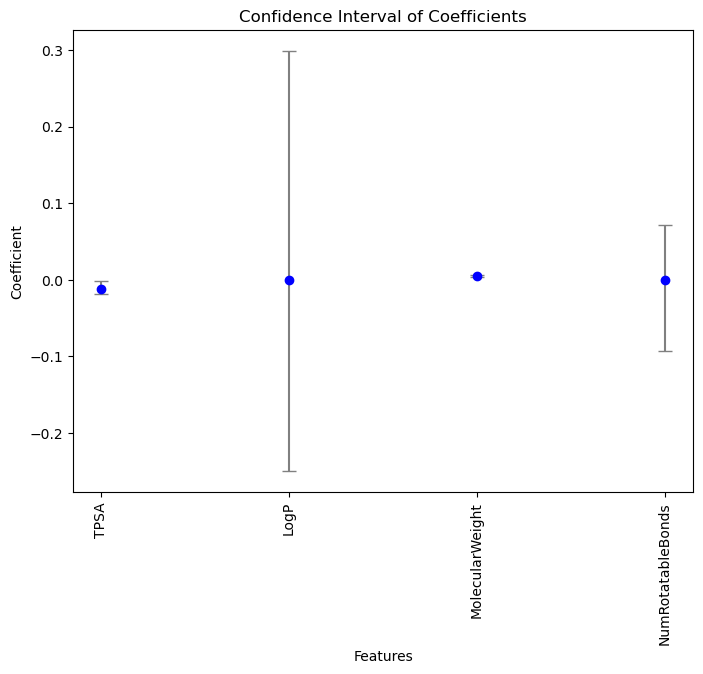

Mean Squared Error: 0.30659218982478453
Mean Absolute Error: 0.42462467700982537
R2 Score: 0.4538661870220261


In [ ]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np

# 데이터 불러오기
data = pd.read_csv("Lipophilicity.csv")

# SMILES -> Mol 변환을 먼저 해두고 (실패하면 None)
data["Mol"] = data["SMILES"].apply(Chem.MolFromSmiles)

# 파싱 실패(None)인 행은 descriptor 계산이 불가하므로 제거
data = data.dropna(subset=["Mol"]).reset_index(drop=True)

# Descriptor 추출 (원래 코드와 동일한 목적, Mol을 사용)
data['TPSA'] = data['Mol'].apply(lambda m: Descriptors.TPSA(m))
data['LogP'] = data['Mol'].apply(lambda m: Descriptors.MolLogP(m))
data['MolecularWeight'] = data['Mol'].apply(lambda m: Descriptors.MolWt(m))
data['NumRotatableBonds'] = data['Mol'].apply(lambda m: Descriptors.NumRotatableBonds(m))

# Lipophilicity2.csv로 저장
data.to_csv("Lipophilicity2.csv", index=False)

# 입력 변수와 타겟 변수 분할
X = data[['TPSA', 'LogP', 'MolecularWeight', 'NumRotatableBonds']]
y = data['Lipophilicity']

# 학습 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ElasticNet 회귀 모델 학습
model = ElasticNet(alpha=1.0, l1_ratio=0.5)
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측 수행
y_pred = model.predict(X_test)

# 잔차 계산
residuals = y_test - y_pred

# 데이터 분포
plt.figure(figsize=(8, 6))
sns.histplot(data['Lipophilicity'], kde=True)
plt.xlabel('Lipophilicity')
plt.ylabel('Frequency')
plt.title('Distribution of Lipophilicity')
plt.show()

# 회귀 결과
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Lipophilicity')
plt.ylabel('Predicted Lipophilicity')
plt.title('Actual vs Predicted Lipophilicity')
plt.show()

# 잔차 분석
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residual Distribution')
plt.show()

# 변수 중요도
coefs = pd.Series(model.coef_, index=X.columns)
sorted_coefs = coefs.abs().sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x=sorted_coefs.index, y=sorted_coefs.values)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Coefficient Magnitude')
plt.title('Feature Importance')
plt.show()

# 다중공선성 분석
corr_matrix = X.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 회귀 계수 신뢰 구간 계산
X_train = sm.add_constant(X_train)
model_with_const = sm.OLS(y_train, X_train).fit()
coef_conf_int = model_with_const.conf_int()

plt.figure(figsize=(8, 6))
plt.errorbar(range(len(coefs)), coefs.values, yerr=np.abs(coef_conf_int.iloc[1:, :].values.T - coefs.values),
             fmt='o', color='blue', ecolor='gray', capsize=5)
plt.xticks(range(len(coefs)), coefs.index, rotation=90)
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.title('Confidence Interval of Coefficients')
plt.show()

# 평가 지표 계산
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 평가 지표 출력
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R2 Score:", r2)

c:\Users\doas1\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


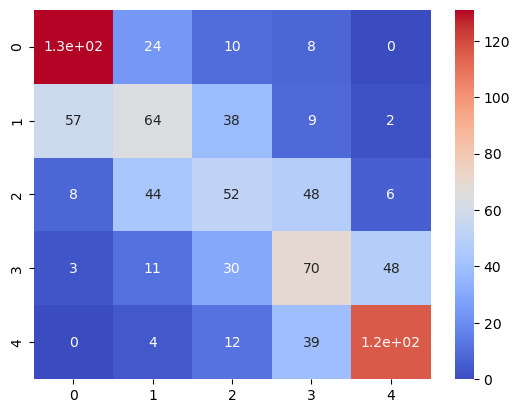

              precision    recall  f1-score   support

           0       0.66      0.76      0.70       173
           1       0.44      0.38      0.40       170
           2       0.37      0.33      0.35       158
           3       0.40      0.43      0.42       162
           4       0.67      0.68      0.68       171

    accuracy                           0.52       834
   macro avg       0.51      0.51      0.51       834
weighted avg       0.51      0.52      0.51       834



C:\Users\doas1\AppData\Local\Temp\ipykernel_46244\722309536.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette='coolwarm')


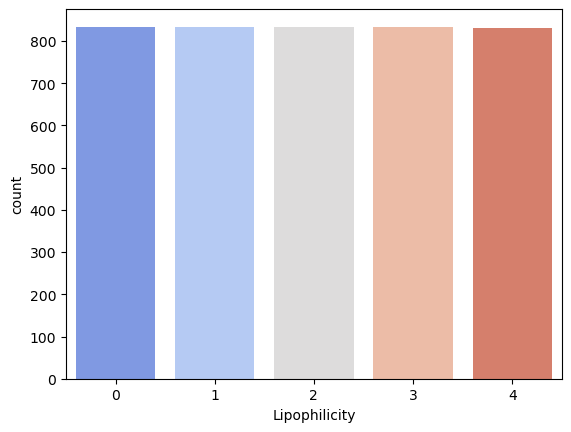

C:\Users\doas1\AppData\Local\Temp\ipykernel_46244\722309536.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_coefs.index, y=sorted_coefs.values, palette='coolwarm')


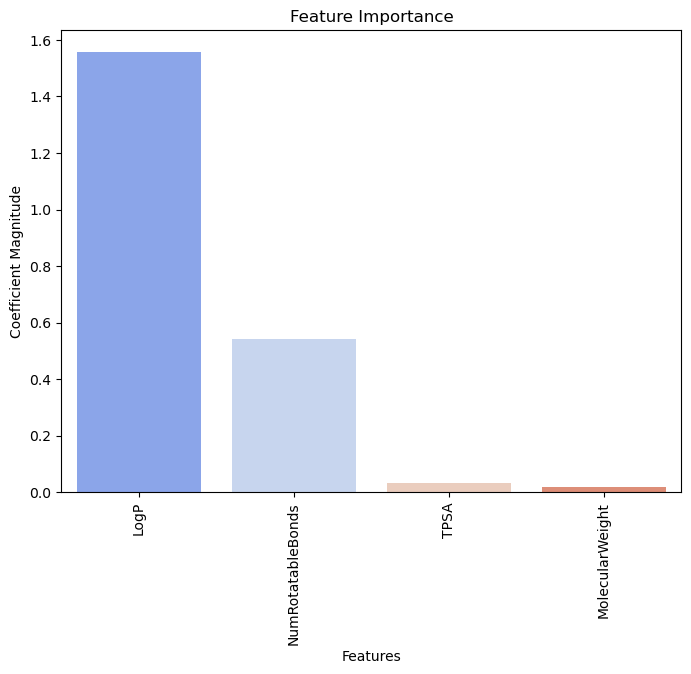

In [ ]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np

# 데이터 불러오기
data = pd.read_csv("Lipophilicity.csv")

# SMILES -> Mol 변환을 먼저 해두고 (실패하면 None)
data["Mol"] = data["SMILES"].apply(Chem.MolFromSmiles)

# 파싱 실패(None)인 행은 descriptor 계산이 불가하므로 제거
data = data.dropna(subset=["Mol"]).reset_index(drop=True)

# Descriptor 추출 (원래 코드와 동일한 목적, Mol을 사용)
data['TPSA'] = data['Mol'].apply(lambda m: Descriptors.TPSA(m))
data['LogP'] = data['Mol'].apply(lambda m: Descriptors.MolLogP(m))
data['MolecularWeight'] = data['Mol'].apply(lambda m: Descriptors.MolWt(m))
data['NumRotatableBonds'] = data['Mol'].apply(lambda m: Descriptors.NumRotatableBonds(m))

# Lipophilicity2.csv로 저장
data.to_csv("Lipophilicity2.csv", index=False)

# 입력 변수와 타겟 변수 분할
X = data[['TPSA', 'LogP', 'MolecularWeight', 'NumRotatableBonds']]
y = pd.qcut(data['Lipophilicity'], q=5, labels=np.arange(5))

# 학습 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 로지스틱 회귀 모델 학습
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측 수행
y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='coolwarm')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))

# 분류 결과 분포
sns.countplot(x=y, palette='coolwarm')
plt.show()

# 변수 중요도
coefs = pd.Series(model.coef_[0], index=X.columns)
sorted_coefs = coefs.abs().sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x=sorted_coefs.index, y=sorted_coefs.values, palette='coolwarm')
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Coefficient Magnitude')
plt.title('Feature Importance')
plt.show()

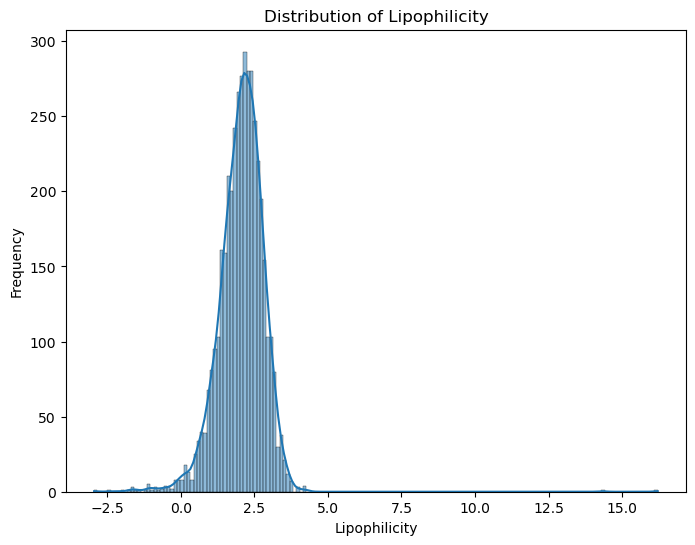

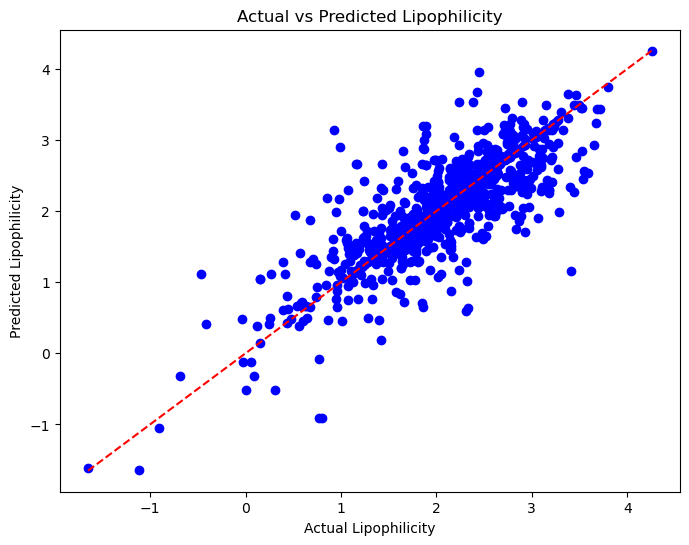

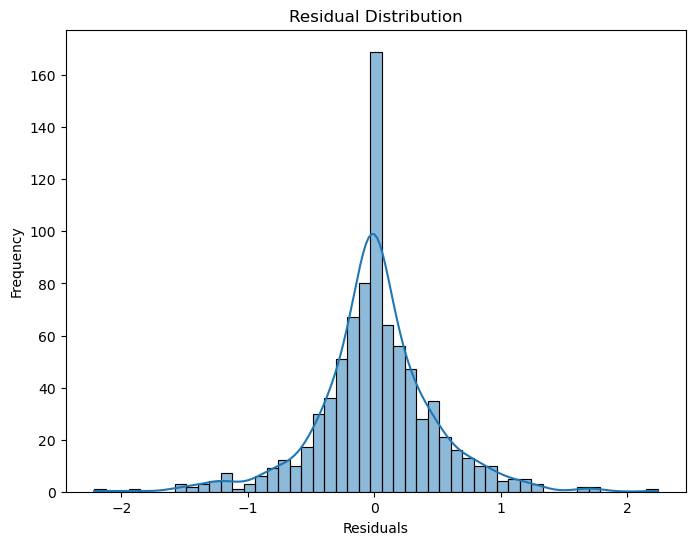

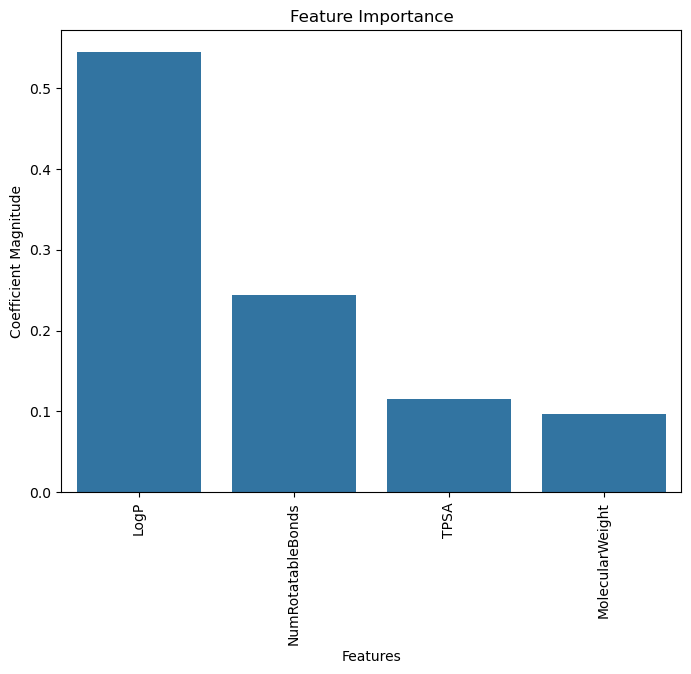

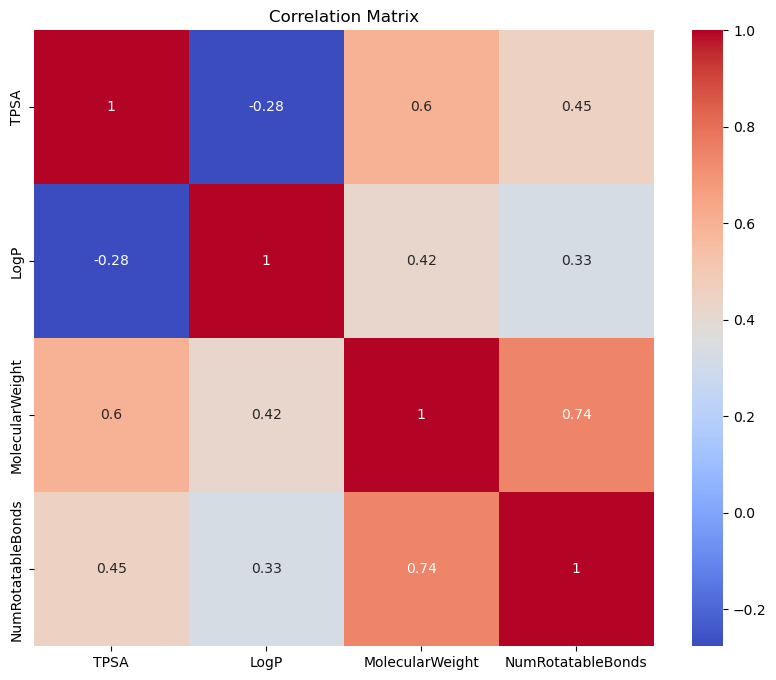

Mean Squared Error: 0.215586022904557
Mean Absolute Error: 0.3140940197607913
R2 Score: 0.6159758121010535


In [ ]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np

# 데이터 불러오기
data = pd.read_csv("Lipophilicity.csv")

# SMILES -> Mol 변환을 먼저 해두고 (실패하면 None)
data["Mol"] = data["SMILES"].apply(Chem.MolFromSmiles)

# 파싱 실패(None)인 행은 descriptor 계산이 불가하므로 제거
data = data.dropna(subset=["Mol"]).reset_index(drop=True)

# Descriptor 추출 (원래 코드와 동일한 목적, Mol을 사용)
data['TPSA'] = data['Mol'].apply(lambda m: Descriptors.TPSA(m))
data['LogP'] = data['Mol'].apply(lambda m: Descriptors.MolLogP(m))
data['MolecularWeight'] = data['Mol'].apply(lambda m: Descriptors.MolWt(m))
data['NumRotatableBonds'] = data['Mol'].apply(lambda m: Descriptors.NumRotatableBonds(m))

# Lipophilicity2.csv로 저장
data.to_csv("Lipophilicity2.csv", index=False)

# 입력 변수와 타겟 변수 분할
X = data[['TPSA', 'LogP', 'MolecularWeight', 'NumRotatableBonds']]
y = data['Lipophilicity']

# 학습 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree 회귀 모델 학습
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측 수행
y_pred = model.predict(X_test)

# 잔차 계산
residuals = y_test - y_pred

# 데이터 분포
plt.figure(figsize=(8, 6))
sns.histplot(data['Lipophilicity'], kde=True)
plt.xlabel('Lipophilicity')
plt.ylabel('Frequency')
plt.title('Distribution of Lipophilicity')
plt.show()

# 회귀 결과
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Lipophilicity')
plt.ylabel('Predicted Lipophilicity')
plt.title('Actual vs Predicted Lipophilicity')
plt.show()

# 잔차 분석
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residual Distribution')
plt.show()

# 변수 중요도
coefs = pd.Series(model.feature_importances_, index=X.columns)
sorted_coefs = coefs.abs().sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x=sorted_coefs.index, y=sorted_coefs.values)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Coefficient Magnitude')
plt.title('Feature Importance')
plt.show()

# 다중공선성 분석
corr_matrix = X.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 평가 지표 계산
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 평가 지표 출력
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R2 Score:", r2)

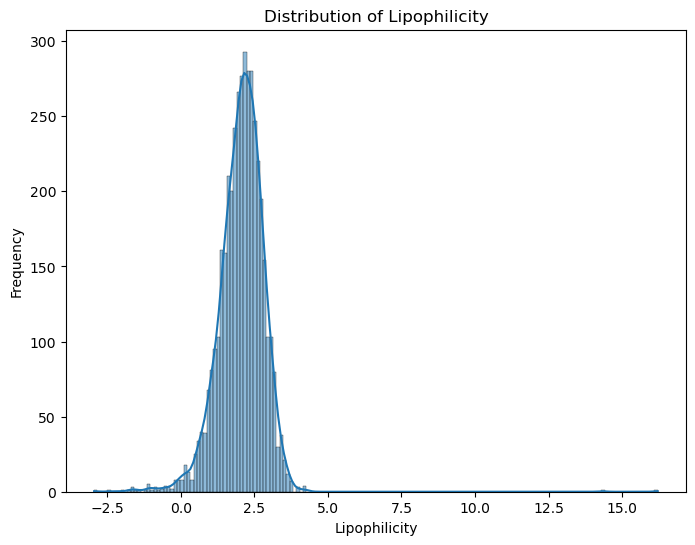

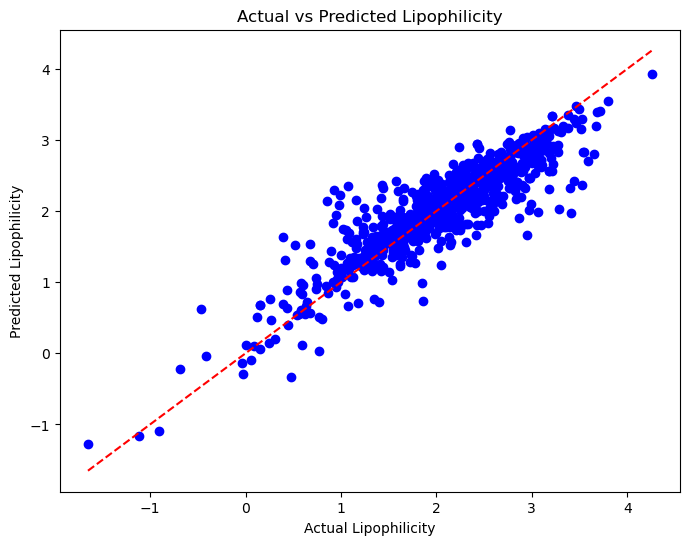

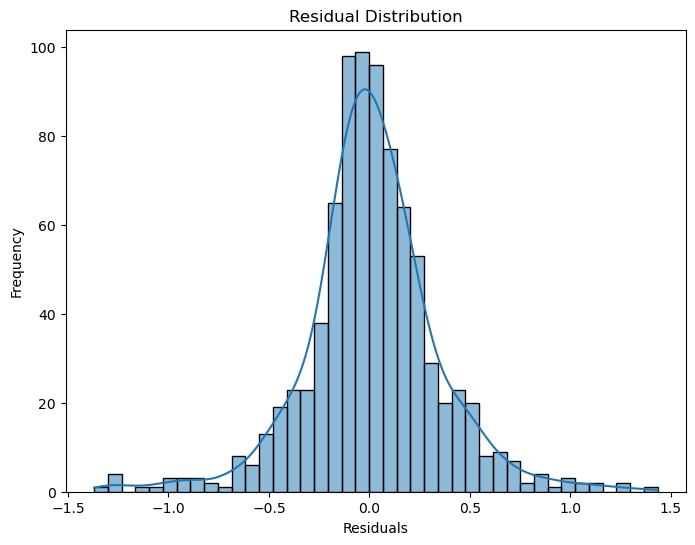

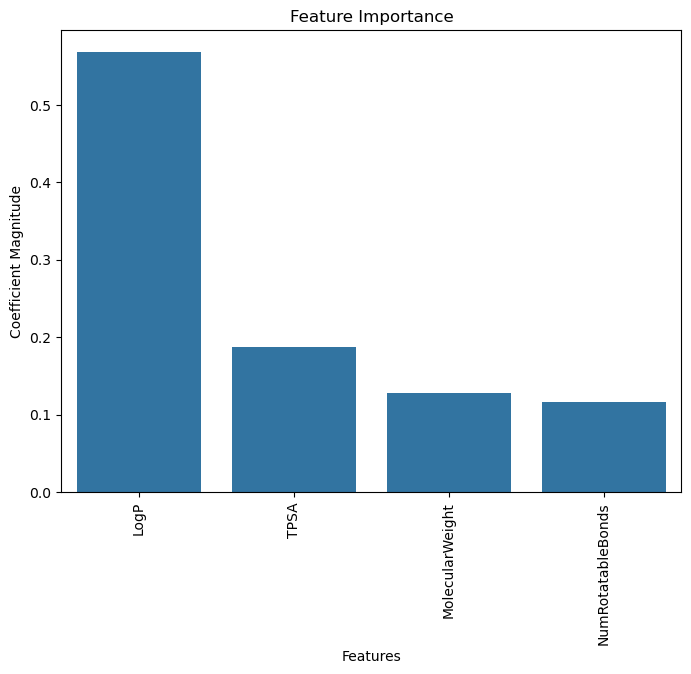

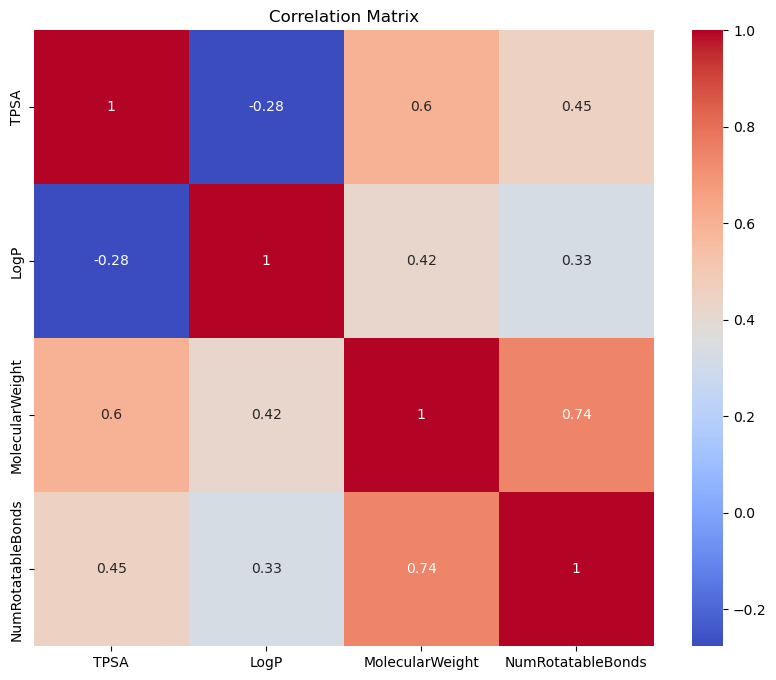

Mean Squared Error: 0.11107015970749995
Mean Absolute Error: 0.23515494934927372
R2 Score: 0.8021503096220559


In [ ]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np

# 데이터 불러오기
data = pd.read_csv("Lipophilicity.csv")

# SMILES -> Mol 변환을 먼저 해두고 (실패하면 None)
data["Mol"] = data["SMILES"].apply(Chem.MolFromSmiles)

# 파싱 실패(None)인 행은 descriptor 계산이 불가하므로 제거
data = data.dropna(subset=["Mol"]).reset_index(drop=True)

# Descriptor 추출 (원래 코드와 동일한 목적, Mol을 사용)
data['TPSA'] = data['Mol'].apply(lambda m: Descriptors.TPSA(m))
data['LogP'] = data['Mol'].apply(lambda m: Descriptors.MolLogP(m))
data['MolecularWeight'] = data['Mol'].apply(lambda m: Descriptors.MolWt(m))
data['NumRotatableBonds'] = data['Mol'].apply(lambda m: Descriptors.NumRotatableBonds(m))

# Lipophilicity2.csv로 저장
data.to_csv("Lipophilicity2.csv", index=False)

# 입력 변수와 타겟 변수 분할
X = data[['TPSA', 'LogP', 'MolecularWeight', 'NumRotatableBonds']]
y = data['Lipophilicity']

# 학습 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest 회귀 모델 학습
model = RandomForestRegressor()
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측 수행
y_pred = model.predict(X_test)

# 잔차 계산
residuals = y_test - y_pred

# 데이터 분포
plt.figure(figsize=(8, 6))
sns.histplot(data['Lipophilicity'], kde=True)
plt.xlabel('Lipophilicity')
plt.ylabel('Frequency')
plt.title('Distribution of Lipophilicity')
plt.show()

# 회귀 결과
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Lipophilicity')
plt.ylabel('Predicted Lipophilicity')
plt.title('Actual vs Predicted Lipophilicity')
plt.show()

# 잔차 분석
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residual Distribution')
plt.show()

# 변수 중요도
coefs = pd.Series(model.feature_importances_, index=X.columns)
sorted_coefs = coefs.abs().sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x=sorted_coefs.index, y=sorted_coefs.values)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Coefficient Magnitude')
plt.title('Feature Importance')
plt.show()

# 다중공선성 분석
corr_matrix = X.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 평가 지표 계산
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 평가 지표 출력
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R2 Score:", r2)

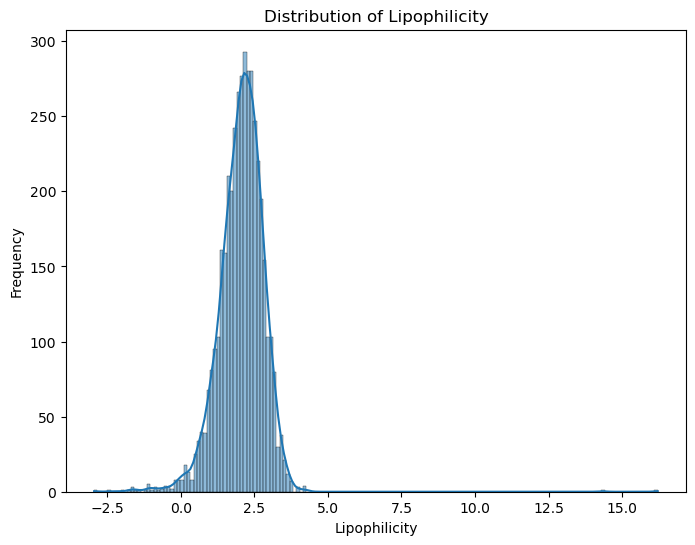

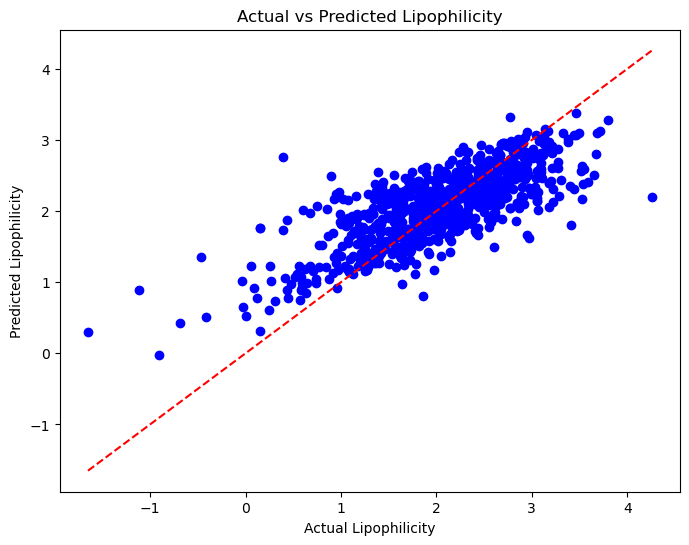

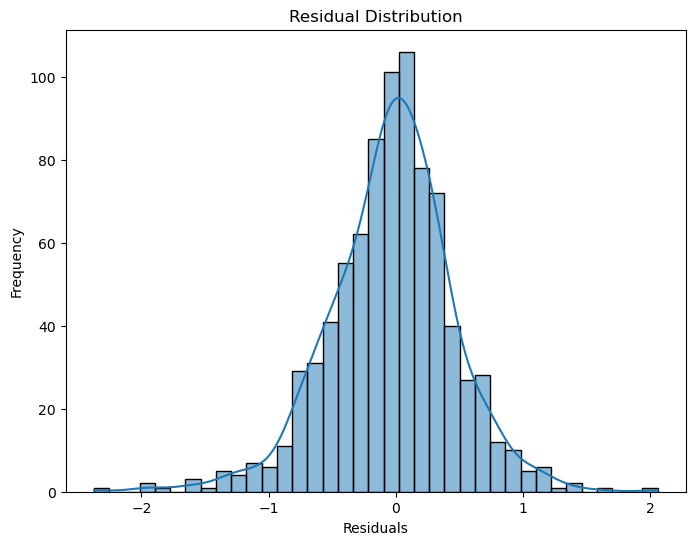

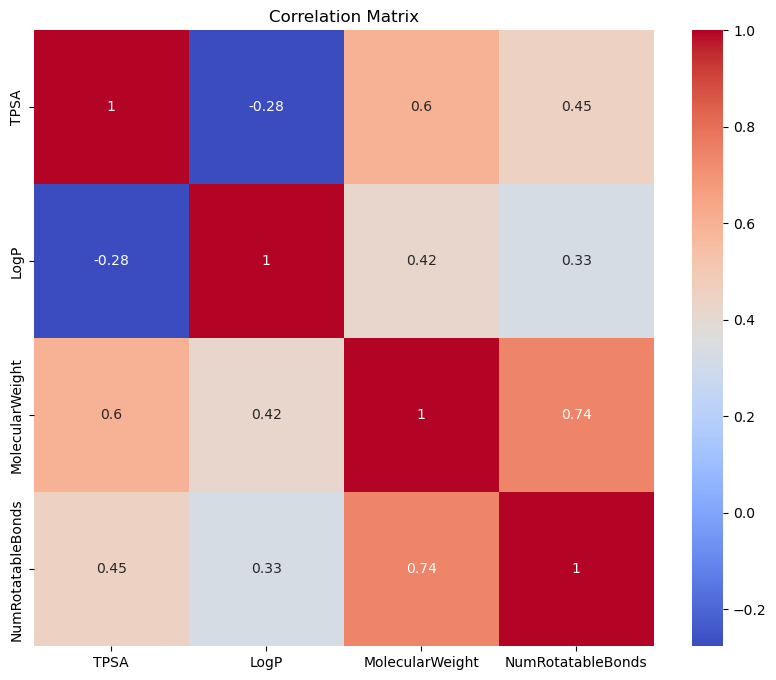

Mean Squared Error: 0.24222210848524184
Mean Absolute Error: 0.36652581407478724
R2 Score: 0.5685288533598655


In [ ]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np

# 데이터 불러오기
data = pd.read_csv("Lipophilicity.csv")

# SMILES -> Mol 변환을 먼저 해두고 (실패하면 None)
data["Mol"] = data["SMILES"].apply(Chem.MolFromSmiles)

# 파싱 실패(None)인 행은 descriptor 계산이 불가하므로 제거
data = data.dropna(subset=["Mol"]).reset_index(drop=True)

# Descriptor 추출 (원래 코드와 동일한 목적, Mol을 사용)
data['TPSA'] = data['Mol'].apply(lambda m: Descriptors.TPSA(m))
data['LogP'] = data['Mol'].apply(lambda m: Descriptors.MolLogP(m))
data['MolecularWeight'] = data['Mol'].apply(lambda m: Descriptors.MolWt(m))
data['NumRotatableBonds'] = data['Mol'].apply(lambda m: Descriptors.NumRotatableBonds(m))

# Lipophilicity2.csv로 저장
data.to_csv("Lipophilicity2.csv", index=False)

# 입력 변수와 타겟 변수 분할
X = data[['TPSA', 'LogP', 'MolecularWeight', 'NumRotatableBonds']]
y = data['Lipophilicity']

# 학습 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SVM 회귀 모델 학습
model = SVR()
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측 수행
y_pred = model.predict(X_test)

# 잔차 계산
residuals = y_test - y_pred

# 데이터 분포
plt.figure(figsize=(8, 6))
sns.histplot(data['Lipophilicity'], kde=True)
plt.xlabel('Lipophilicity')
plt.ylabel('Frequency')
plt.title('Distribution of Lipophilicity')
plt.show()

# 회귀 결과
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Lipophilicity')
plt.ylabel('Predicted Lipophilicity')
plt.title('Actual vs Predicted Lipophilicity')
plt.show()

# 잔차 분석
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residual Distribution')
plt.show()

# 다중공선성 분석
corr_matrix = X.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 평가 지표 계산
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 평가 지표 출력
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R2 Score:", r2)

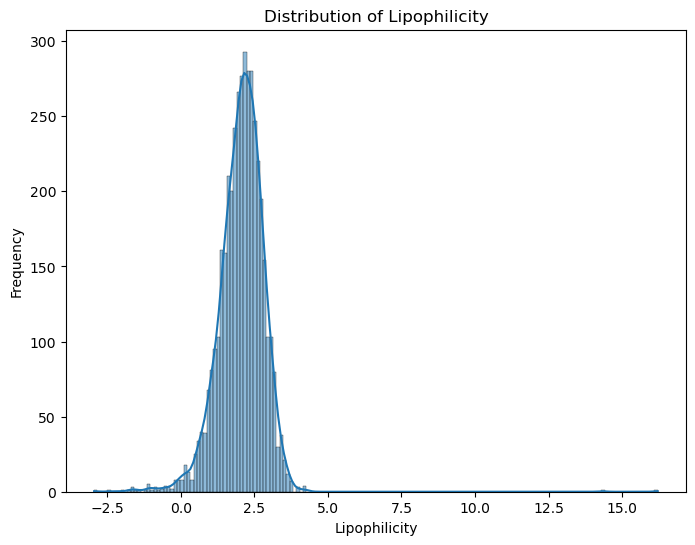

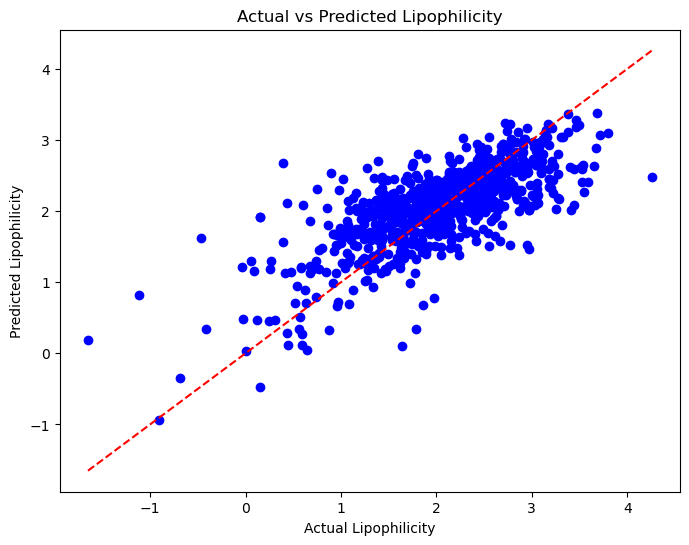

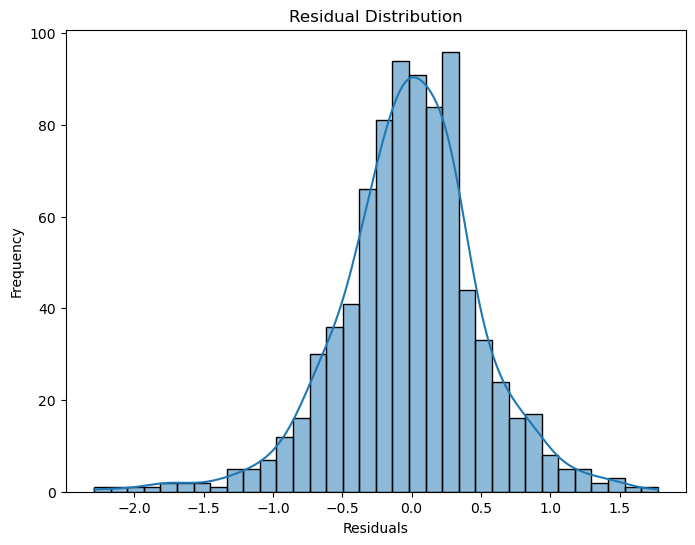

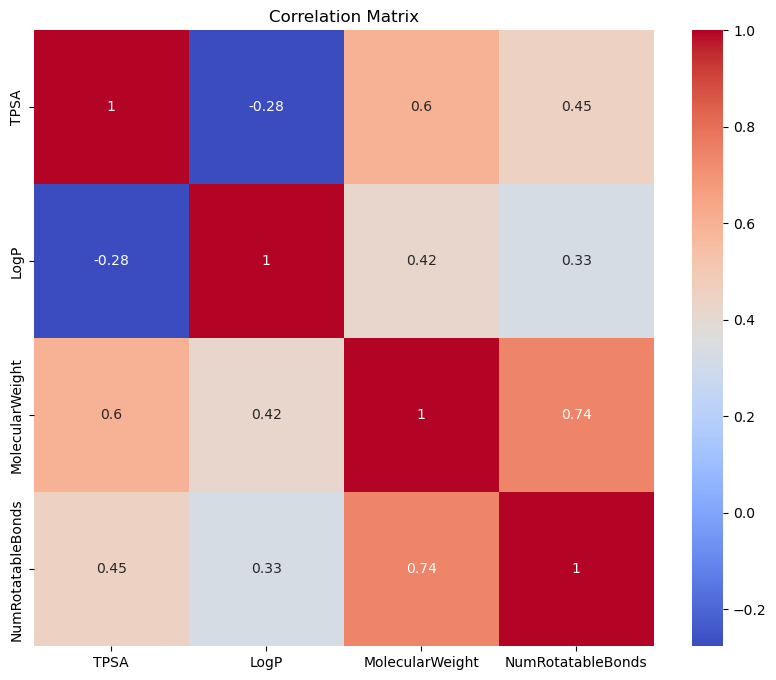

Mean Squared Error: 0.2574991670130904
Mean Absolute Error: 0.3761477706028777
R2 Score: 0.5413157719383532


In [ ]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np

# 데이터 불러오기
data = pd.read_csv("Lipophilicity.csv")

# SMILES -> Mol 변환을 먼저 해두고 (실패하면 None)
data["Mol"] = data["SMILES"].apply(Chem.MolFromSmiles)

# 파싱 실패(None)인 행은 descriptor 계산이 불가하므로 제거
data = data.dropna(subset=["Mol"]).reset_index(drop=True)

# Descriptor 추출 (원래 코드와 동일한 목적, Mol을 사용)
data['TPSA'] = data['Mol'].apply(lambda m: Descriptors.TPSA(m))
data['LogP'] = data['Mol'].apply(lambda m: Descriptors.MolLogP(m))
data['MolecularWeight'] = data['Mol'].apply(lambda m: Descriptors.MolWt(m))
data['NumRotatableBonds'] = data['Mol'].apply(lambda m: Descriptors.NumRotatableBonds(m))

# Lipophilicity2.csv로 저장
data.to_csv("Lipophilicity2.csv", index=False)

# 입력 변수와 타겟 변수 분할
X = data[['TPSA', 'LogP', 'MolecularWeight', 'NumRotatableBonds']]
y = data['Lipophilicity']

# 학습 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# K-최근접 이웃 회귀 모델 학습
model = KNeighborsRegressor()
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측 수행
y_pred = model.predict(X_test)

# 잔차 계산
residuals = y_test - y_pred

# 데이터 분포
plt.figure(figsize=(8, 6))
sns.histplot(data['Lipophilicity'], kde=True)
plt.xlabel('Lipophilicity')
plt.ylabel('Frequency')
plt.title('Distribution of Lipophilicity')
plt.show()

# 회귀 결과
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Lipophilicity')
plt.ylabel('Predicted Lipophilicity')
plt.title('Actual vs Predicted Lipophilicity')
plt.show()

# 잔차 분석
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residual Distribution')
plt.show()

# 다중공선성 분석
corr_matrix = X.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 평가 지표 계산
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 평가 지표 출력
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R2 Score:", r2)

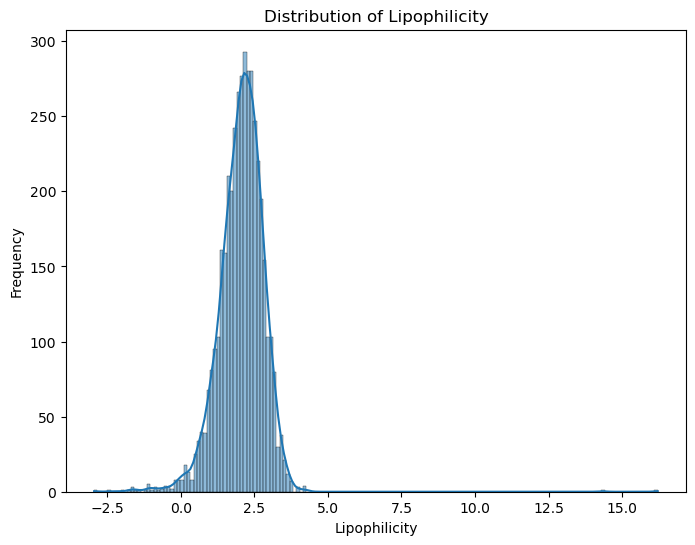

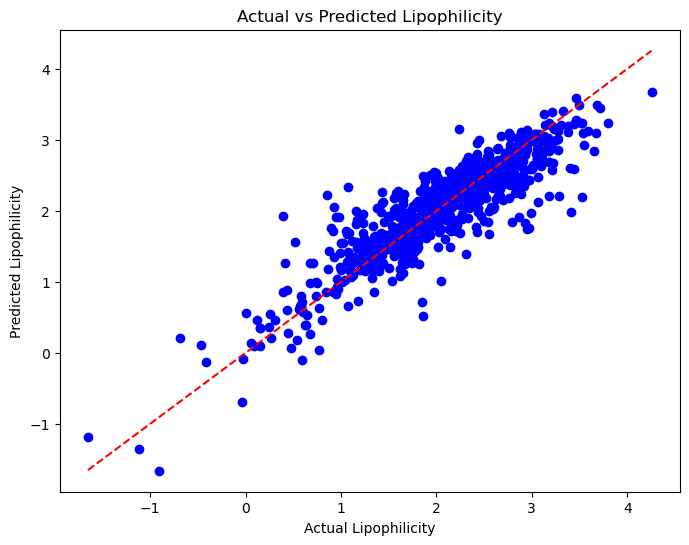

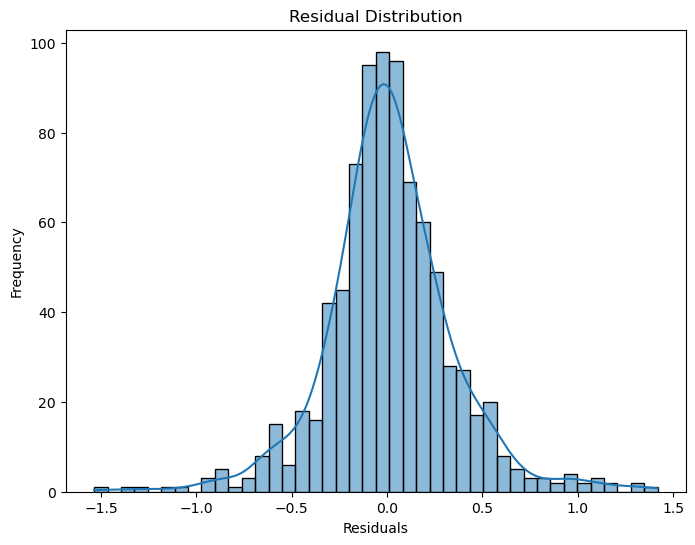

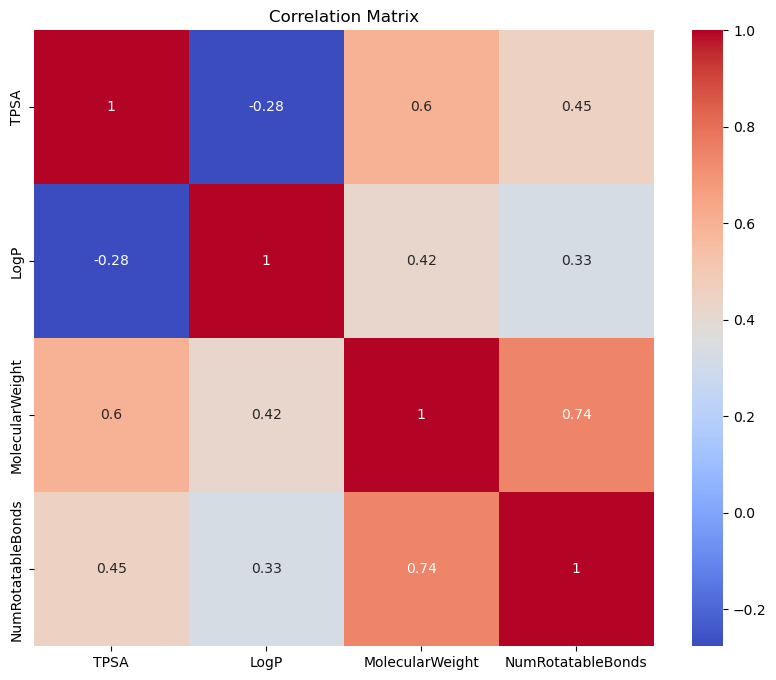

Mean Squared Error: 0.11254005652656975
Mean Absolute Error: 0.23855634159776826
R2 Score: 0.7995319769276009


In [ ]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np

# 데이터 불러오기
data = pd.read_csv("Lipophilicity.csv")

# SMILES -> Mol 변환을 먼저 해두고 (실패하면 None)
data["Mol"] = data["SMILES"].apply(Chem.MolFromSmiles)

# 파싱 실패(None)인 행은 descriptor 계산이 불가하므로 제거
data = data.dropna(subset=["Mol"]).reset_index(drop=True)

# Descriptor 추출 (원래 코드와 동일한 목적, Mol을 사용)
data['TPSA'] = data['Mol'].apply(lambda m: Descriptors.TPSA(m))
data['LogP'] = data['Mol'].apply(lambda m: Descriptors.MolLogP(m))
data['MolecularWeight'] = data['Mol'].apply(lambda m: Descriptors.MolWt(m))
data['NumRotatableBonds'] = data['Mol'].apply(lambda m: Descriptors.NumRotatableBonds(m))

# Lipophilicity2.csv로 저장
data.to_csv("Lipophilicity2.csv", index=False)

# 입력 변수와 타겟 변수 분할
X = data[['TPSA', 'LogP', 'MolecularWeight', 'NumRotatableBonds']]
y = data['Lipophilicity']

# 학습 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost 회귀 모델 학습
model = XGBRegressor()
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측 수행
y_pred = model.predict(X_test)

# 잔차 계산
residuals = y_test - y_pred

# 데이터 분포
plt.figure(figsize=(8, 6))
sns.histplot(data['Lipophilicity'], kde=True)
plt.xlabel('Lipophilicity')
plt.ylabel('Frequency')
plt.title('Distribution of Lipophilicity')
plt.show()

# 회귀 결과
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Lipophilicity')
plt.ylabel('Predicted Lipophilicity')
plt.title('Actual vs Predicted Lipophilicity')
plt.show()

# 잔차 분석
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residual Distribution')
plt.show()

# 다중공선성 분석
corr_matrix = X.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 평가 지표 계산
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 평가 지표 출력
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R2 Score:", r2)

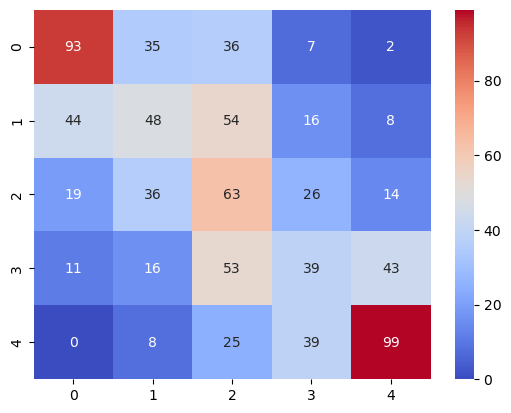

              precision    recall  f1-score   support

           0       0.56      0.54      0.55       173
           1       0.34      0.28      0.31       170
           2       0.27      0.40      0.32       158
           3       0.31      0.24      0.27       162
           4       0.60      0.58      0.59       171

    accuracy                           0.41       834
   macro avg       0.41      0.41      0.41       834
weighted avg       0.42      0.41      0.41       834



C:\Users\doas1\AppData\Local\Temp\ipykernel_46244\3219325165.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette='coolwarm')


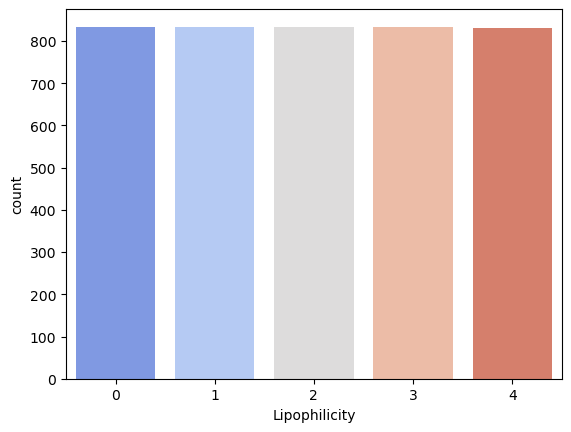

In [ ]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np

# 데이터 불러오기
data = pd.read_csv("Lipophilicity.csv")

# SMILES -> Mol 변환을 먼저 해두고 (실패하면 None)
data["Mol"] = data["SMILES"].apply(Chem.MolFromSmiles)

# 파싱 실패(None)인 행은 descriptor 계산이 불가하므로 제거
data = data.dropna(subset=["Mol"]).reset_index(drop=True)

# Descriptor 추출 (원래 코드와 동일한 목적, Mol을 사용)
data['TPSA'] = data['Mol'].apply(lambda m: Descriptors.TPSA(m))
data['LogP'] = data['Mol'].apply(lambda m: Descriptors.MolLogP(m))
data['MolecularWeight'] = data['Mol'].apply(lambda m: Descriptors.MolWt(m))
data['NumRotatableBonds'] = data['Mol'].apply(lambda m: Descriptors.NumRotatableBonds(m))

# Lipophilicity2.csv로 저장
data.to_csv("Lipophilicity2.csv", index=False)

# 입력 변수와 타겟 변수 분할
X = data[['TPSA', 'LogP', 'MolecularWeight', 'NumRotatableBonds']]
y = pd.qcut(data['Lipophilicity'], q=5, labels=np.arange(5))

# 학습 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 서포트 벡터 머신 모델 학습
model = SVC()
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측 수행
y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='coolwarm')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))

# 분류 결과 분포
sns.countplot(x=y, palette='coolwarm')
plt.show()

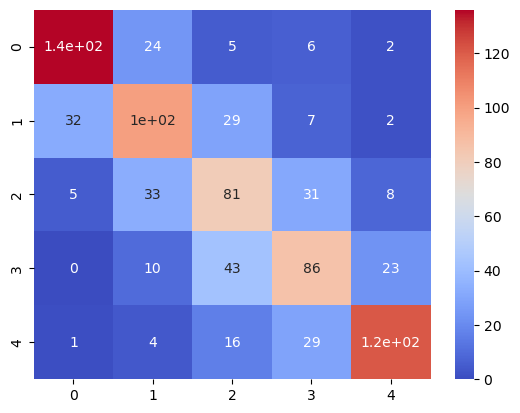

              precision    recall  f1-score   support

           0       0.78      0.79      0.78       173
           1       0.58      0.59      0.59       170
           2       0.47      0.51      0.49       158
           3       0.54      0.53      0.54       162
           4       0.78      0.71      0.74       171

    accuracy                           0.63       834
   macro avg       0.63      0.63      0.63       834
weighted avg       0.63      0.63      0.63       834



C:\Users\doas1\AppData\Local\Temp\ipykernel_46244\3788627153.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette='coolwarm')


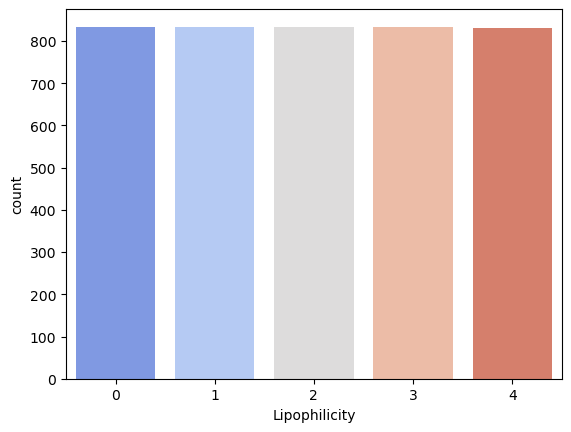

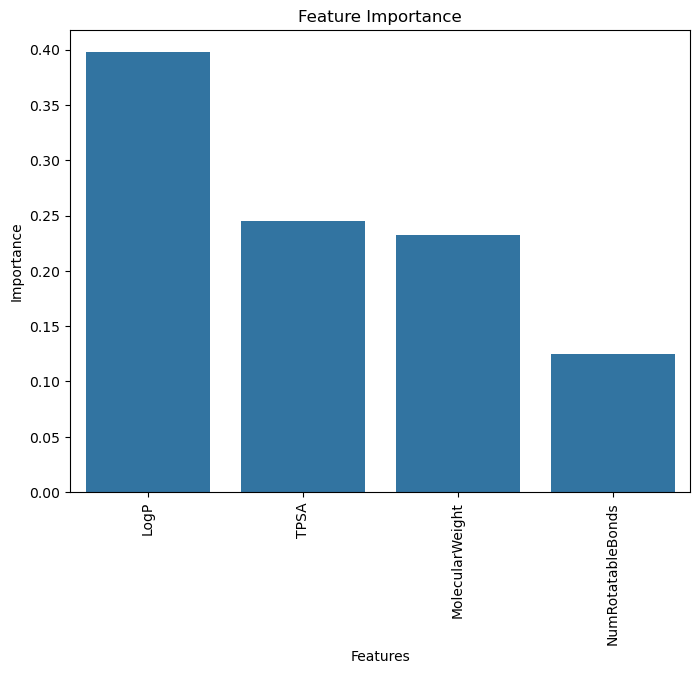

In [ ]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 데이터 불러오기
data = pd.read_csv("Lipophilicity.csv")

# SMILES -> Mol 변환을 먼저 해두고 (실패하면 None)
data["Mol"] = data["SMILES"].apply(Chem.MolFromSmiles)

# 파싱 실패(None)인 행은 descriptor 계산이 불가하므로 제거
data = data.dropna(subset=["Mol"]).reset_index(drop=True)

# Descriptor 추출 (원래 코드와 동일한 목적, Mol을 사용)
data['TPSA'] = data['Mol'].apply(lambda m: Descriptors.TPSA(m))
data['LogP'] = data['Mol'].apply(lambda m: Descriptors.MolLogP(m))
data['MolecularWeight'] = data['Mol'].apply(lambda m: Descriptors.MolWt(m))
data['NumRotatableBonds'] = data['Mol'].apply(lambda m: Descriptors.NumRotatableBonds(m))

# Lipophilicity2.csv로 저장
data.to_csv("Lipophilicity2.csv", index=False)

# 입력 변수와 타겟 변수 분할
X = data[['TPSA', 'LogP', 'MolecularWeight', 'NumRotatableBonds']]
y = pd.qcut(data['Lipophilicity'], q=5, labels=np.arange(5))

# 학습 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 분류 모델 학습
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측 수행
y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='coolwarm')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))

# 분류 결과 분포
sns.countplot(x=y, palette='coolwarm')
plt.show()

# 변수 중요도
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8, 6))
sns.barplot(x=X.columns[indices], y=importances[indices])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

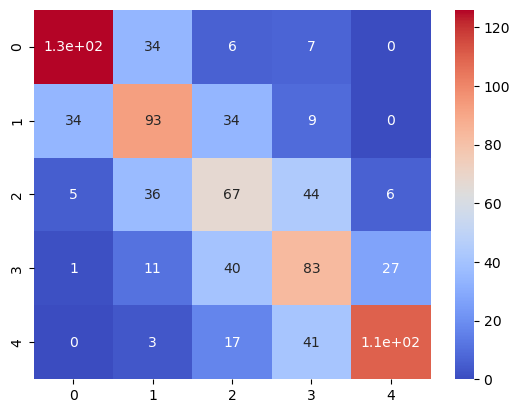

              precision    recall  f1-score   support

           0       0.76      0.73      0.74       173
           1       0.53      0.55      0.54       170
           2       0.41      0.42      0.42       158
           3       0.45      0.51      0.48       162
           4       0.77      0.64      0.70       171

    accuracy                           0.57       834
   macro avg       0.58      0.57      0.58       834
weighted avg       0.59      0.57      0.58       834



C:\Users\doas1\AppData\Local\Temp\ipykernel_46244\142377251.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette='coolwarm')


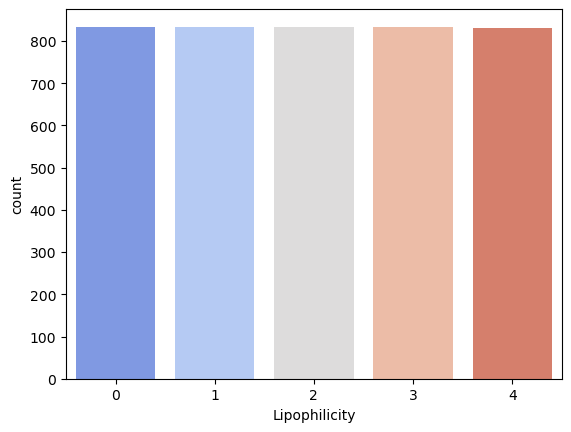

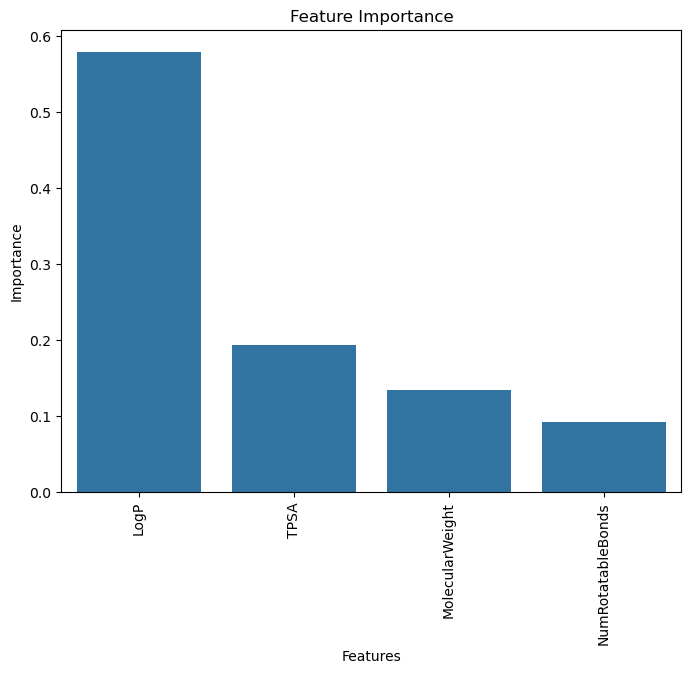

In [ ]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 데이터 불러오기
data = pd.read_csv("Lipophilicity.csv")

# SMILES -> Mol 변환을 먼저 해두고 (실패하면 None)
data["Mol"] = data["SMILES"].apply(Chem.MolFromSmiles)

# 파싱 실패(None)인 행은 descriptor 계산이 불가하므로 제거
data = data.dropna(subset=["Mol"]).reset_index(drop=True)

# Descriptor 추출 (원래 코드와 동일한 목적, Mol을 사용)
data['TPSA'] = data['Mol'].apply(lambda m: Descriptors.TPSA(m))
data['LogP'] = data['Mol'].apply(lambda m: Descriptors.MolLogP(m))
data['MolecularWeight'] = data['Mol'].apply(lambda m: Descriptors.MolWt(m))
data['NumRotatableBonds'] = data['Mol'].apply(lambda m: Descriptors.NumRotatableBonds(m))

# Lipophilicity2.csv로 저장
data.to_csv("Lipophilicity2.csv", index=False)

# 입력 변수와 타겟 변수 분할
X = data[['TPSA', 'LogP', 'MolecularWeight', 'NumRotatableBonds']]
y = pd.qcut(data['Lipophilicity'], q=5, labels=np.arange(5))

# 학습 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Gradient Boosting 분류 모델 학습
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측 수행
y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='coolwarm')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))

# 분류 결과 분포
sns.countplot(x=y, palette='coolwarm')
plt.show()

# 변수 중요도
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8, 6))
sns.barplot(x=X.columns[indices], y=importances[indices])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

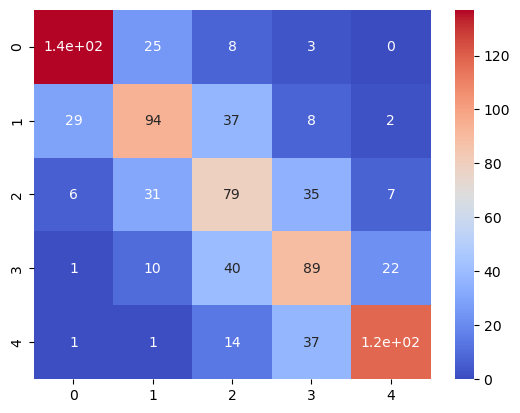

              precision    recall  f1-score   support

           0       0.79      0.79      0.79       173
           1       0.58      0.55      0.57       170
           2       0.44      0.50      0.47       158
           3       0.52      0.55      0.53       162
           4       0.79      0.69      0.74       171

    accuracy                           0.62       834
   macro avg       0.62      0.62      0.62       834
weighted avg       0.63      0.62      0.62       834



C:\Users\doas1\AppData\Local\Temp\ipykernel_46244\523883583.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette='coolwarm')


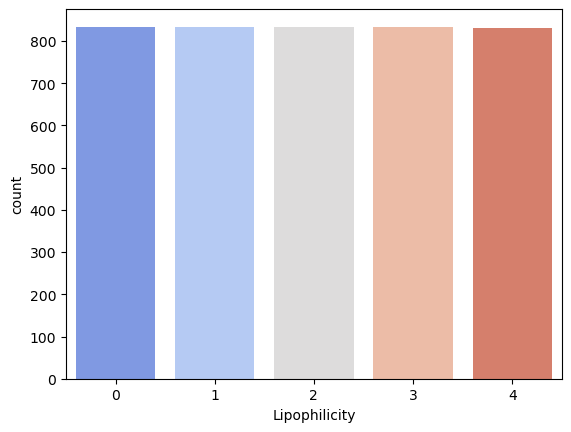

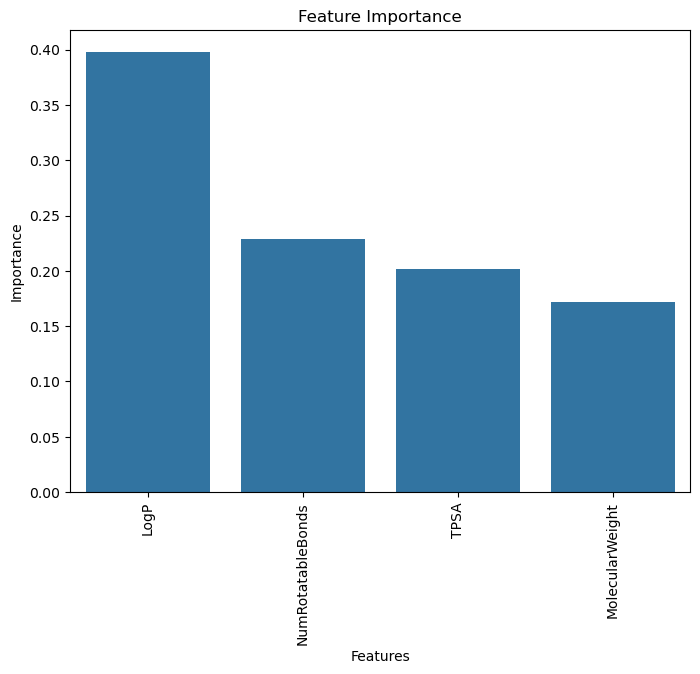

In [ ]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 데이터 불러오기
data = pd.read_csv("Lipophilicity.csv")

#SMILES -> Mol 변환을 먼저 해두고 (실패하면 None)
data["Mol"] = data["SMILES"].apply(Chem.MolFromSmiles)

#파싱 실패(None)인 행은 descriptor 계산이 불가하므로 제거
data = data.dropna(subset=["Mol"]).reset_index(drop=True)

# Descriptor 추출 (원래 코드와 동일한 목적, Mol을 사용)
data['TPSA'] = data['Mol'].apply(lambda m: Descriptors.TPSA(m))
data['LogP'] = data['Mol'].apply(lambda m: Descriptors.MolLogP(m))
data['MolecularWeight'] = data['Mol'].apply(lambda m: Descriptors.MolWt(m))
data['NumRotatableBonds'] = data['Mol'].apply(lambda m: Descriptors.NumRotatableBonds(m))

# Lipophilicity2.csv로 저장
data.to_csv("Lipophilicity2.csv", index=False)

# 입력 변수와 타겟 변수 분할
X = data[['TPSA', 'LogP', 'MolecularWeight', 'NumRotatableBonds']]
y = pd.qcut(data['Lipophilicity'], q=5, labels=False)

# 학습 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost 분류 모델 학습
model = XGBClassifier()
# model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측 수행
y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='coolwarm')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))

# 분류 결과 분포
sns.countplot(x=y, palette='coolwarm')
plt.show()

# 변수 중요도
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8, 6))
sns.barplot(x=X.columns[indices], y=importances[indices])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

c:\Users\doas1\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:00:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


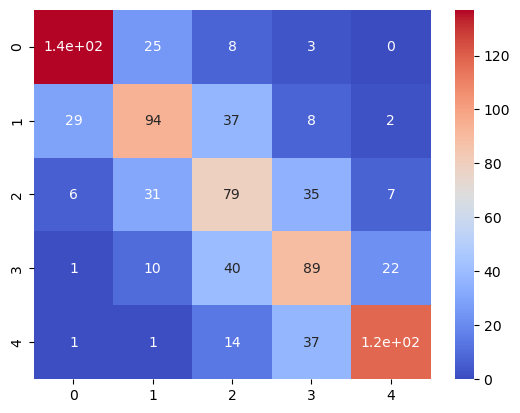

              precision    recall  f1-score   support

           0       0.79      0.79      0.79       173
           1       0.58      0.55      0.57       170
           2       0.44      0.50      0.47       158
           3       0.52      0.55      0.53       162
           4       0.79      0.69      0.74       171

    accuracy                           0.62       834
   macro avg       0.62      0.62      0.62       834
weighted avg       0.63      0.62      0.62       834



C:\Users\doas1\AppData\Local\Temp\ipykernel_46244\3914136560.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette='coolwarm')


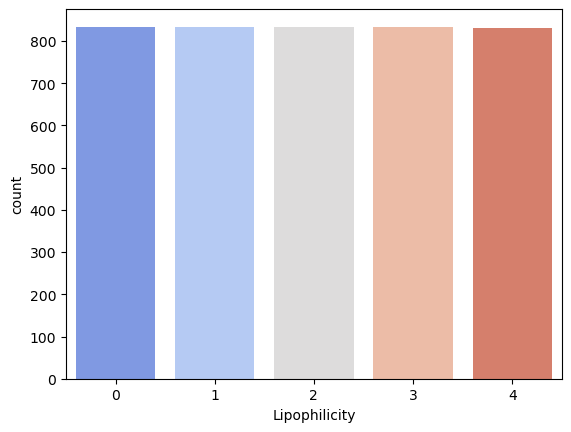

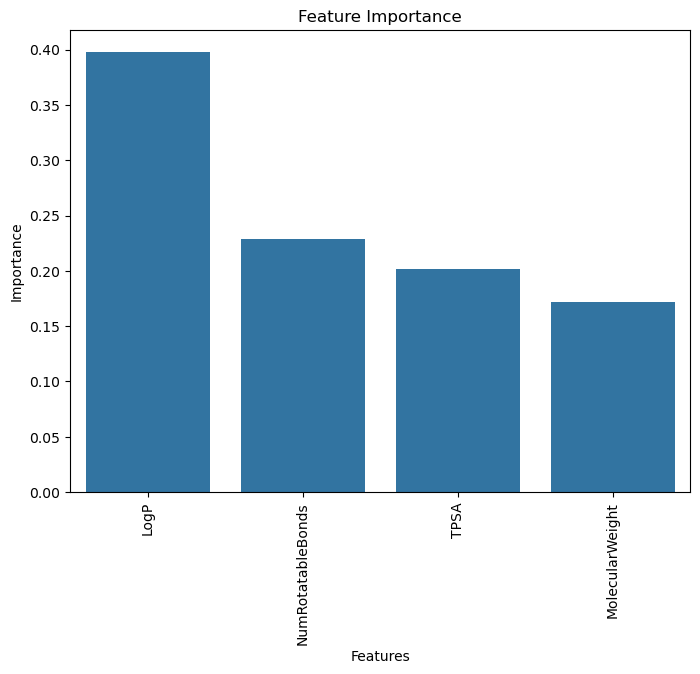

In [ ]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 데이터 불러오기
data = pd.read_csv("Lipophilicity.csv")

#SMILES -> Mol 변환을 먼저 해두고 (실패하면 None)
data["Mol"] = data["SMILES"].apply(Chem.MolFromSmiles)

#파싱 실패(None)인 행은 descriptor 계산이 불가하므로 제거
data = data.dropna(subset=["Mol"]).reset_index(drop=True)

# Descriptor 추출 (원래 코드와 동일한 목적, Mol을 사용)
data['TPSA'] = data['Mol'].apply(lambda m: Descriptors.TPSA(m))
data['LogP'] = data['Mol'].apply(lambda m: Descriptors.MolLogP(m))
data['MolecularWeight'] = data['Mol'].apply(lambda m: Descriptors.MolWt(m))
data['NumRotatableBonds'] = data['Mol'].apply(lambda m: Descriptors.NumRotatableBonds(m))

# Lipophilicity2.csv로 저장
data.to_csv("Lipophilicity2.csv", index=False)

# 입력 변수와 타겟 변수 분할
X = data[['TPSA', 'LogP', 'MolecularWeight', 'NumRotatableBonds']]
y = pd.qcut(data['Lipophilicity'], q=5, labels=False)

# 학습 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost 분류 모델 학습
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측 수행
y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='coolwarm')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))

# 분류 결과 분포
sns.countplot(x=y, palette='coolwarm')
plt.show()

# 변수 중요도
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8, 6))
sns.barplot(x=X.columns[indices], y=importances[indices])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001470 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 784
[LightGBM] [Info] Number of data points in the train set: 3332, number of used features: 4
[LightGBM] [Info] Start training from score -1.617574
[LightGBM] [Info] Start training from score -1.614553
[LightGBM] [Info] Start training from score -1.596615
[LightGBM] [Info] Start training from score -1.601070
[LightGBM] [Info] Start training from score -1.617574


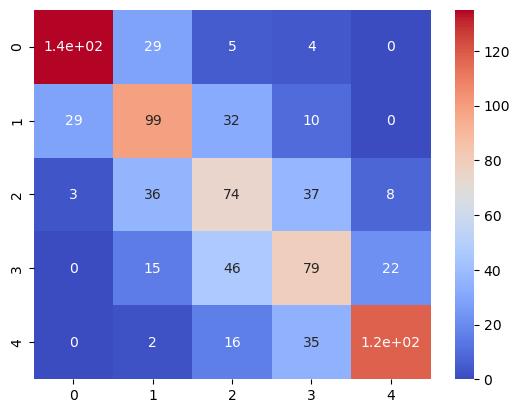

              precision    recall  f1-score   support

           0       0.81      0.78      0.79       173
           1       0.55      0.58      0.56       170
           2       0.43      0.47      0.45       158
           3       0.48      0.49      0.48       162
           4       0.80      0.69      0.74       171

    accuracy                           0.61       834
   macro avg       0.61      0.60      0.61       834
weighted avg       0.62      0.61      0.61       834



C:\Users\doas1\AppData\Local\Temp\ipykernel_46244\1495596167.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette='coolwarm')


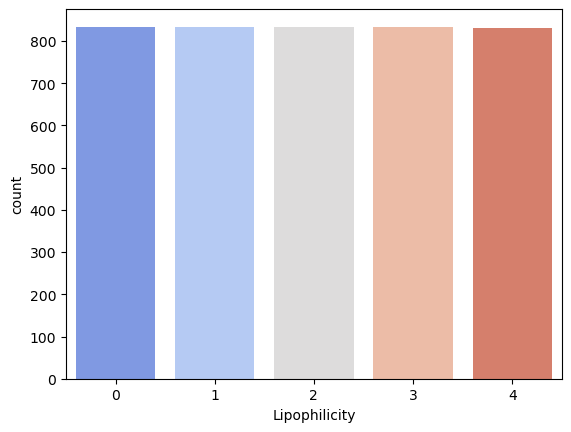

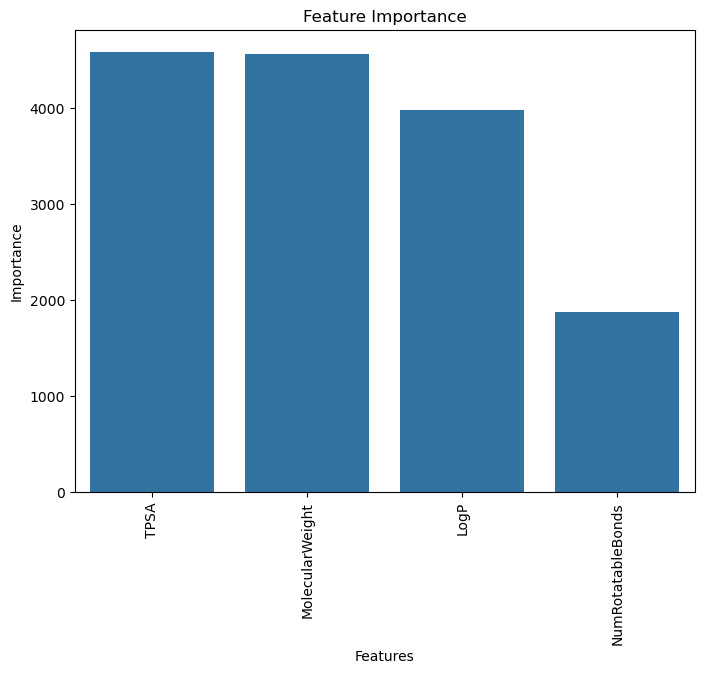

In [ ]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 데이터 불러오기
data = pd.read_csv("Lipophilicity.csv")

#SMILES -> Mol 변환을 먼저 해두고 (실패하면 None)
data["Mol"] = data["SMILES"].apply(Chem.MolFromSmiles)

#파싱 실패(None)인 행은 descriptor 계산이 불가하므로 제거
data = data.dropna(subset=["Mol"]).reset_index(drop=True)

# Descriptor 추출 (원래 코드와 동일한 목적, Mol을 사용)
data['TPSA'] = data['Mol'].apply(lambda m: Descriptors.TPSA(m))
data['LogP'] = data['Mol'].apply(lambda m: Descriptors.MolLogP(m))
data['MolecularWeight'] = data['Mol'].apply(lambda m: Descriptors.MolWt(m))
data['NumRotatableBonds'] = data['Mol'].apply(lambda m: Descriptors.NumRotatableBonds(m))

# Lipophilicity2.csv로 저장
data.to_csv("Lipophilicity2.csv", index=False)

# 입력 변수와 타겟 변수 분할
X = data[['TPSA', 'LogP', 'MolecularWeight', 'NumRotatableBonds']]
y = pd.qcut(data['Lipophilicity'], q=5, labels=False)

# 학습 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# LightGBM 분류 모델 학습
model = LGBMClassifier()
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측 수행
y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='coolwarm')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))

# 분류 결과 분포
sns.countplot(x=y, palette='coolwarm')
plt.show()

# 변수 중요도
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8, 6))
sns.barplot(x=X.columns[indices], y=importances[indices])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

In [22]:
!pip install catboost

   ---------------------------------------- 0.0/100.2 MB ? eta -:--:--
   ---------------------------------------- 0.1/100.2 MB 3.6 MB/s eta 0:00:28
   - -------------------------------------- 2.8/100.2 MB 35.8 MB/s eta 0:00:03
   -- ------------------------------------- 5.7/100.2 MB 45.6 MB/s eta 0:00:03
   --- ------------------------------------ 8.6/100.2 MB 50.0 MB/s eta 0:00:02
   ---- ----------------------------------- 11.6/100.2 MB 65.6 MB/s eta 0:00:02
   ----- ---------------------------------- 14.5/100.2 MB 65.2 MB/s eta 0:00:02
   ------ --------------------------------- 17.4/100.2 MB 65.2 MB/s eta 0:00:02
   -------- ------------------------------- 20.3/100.2 MB 65.6 MB/s eta 0:00:02
   --------- ------------------------------ 23.2/100.2 MB 65.6 MB/s eta 0:00:02
   --------- ------------------------------ 23.3/100.2 MB 54.4 MB/s eta 0:00:02
   --------- ------------------------------ 23.3/100.2 MB 46.7 MB/s eta 0:00:02
   --------- ------------------------------ 23.4/100.2

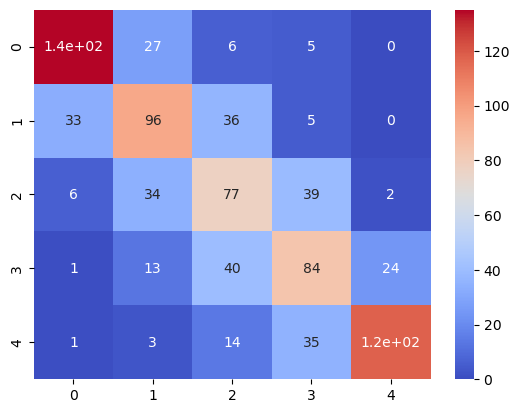

              precision    recall  f1-score   support

           0       0.77      0.78      0.77       173
           1       0.55      0.56      0.56       170
           2       0.45      0.49      0.47       158
           3       0.50      0.52      0.51       162
           4       0.82      0.69      0.75       171

    accuracy                           0.61       834
   macro avg       0.62      0.61      0.61       834
weighted avg       0.62      0.61      0.62       834



C:\Users\doas1\AppData\Local\Temp\ipykernel_46244\1912631628.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette='coolwarm')


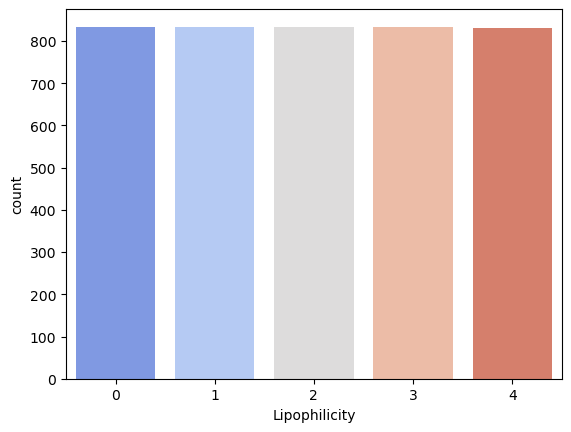

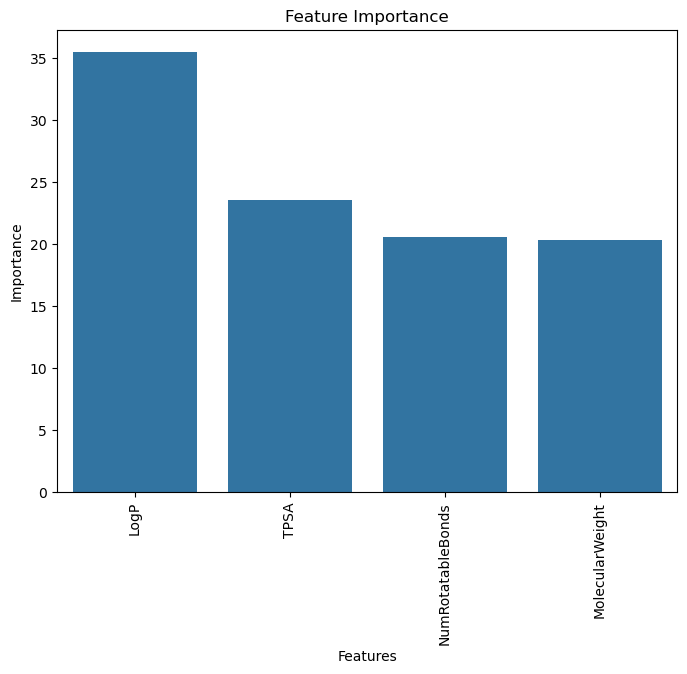

In [ ]:
# !pip install catboost   # 이미 설치되어 있다면 생략 가능

import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 데이터 불러오기
data = pd.read_csv("Lipophilicity.csv")

#SMILES -> Mol 변환을 먼저 수행 (파싱 실패 시 None 반환)
data["Mol"] = data["SMILES"].apply(Chem.MolFromSmiles)

#RDKit 파싱 실패(None)인 행 제거 (descriptor 계산 오류 방지)
data = data.dropna(subset=["Mol"]).reset_index(drop=True)

# Descriptor 추출 (Mol 객체를 사용하여 안정적으로 계산)
data['TPSA'] = data['Mol'].apply(lambda m: Descriptors.TPSA(m))
data['LogP'] = data['Mol'].apply(lambda m: Descriptors.MolLogP(m))
data['MolecularWeight'] = data['Mol'].apply(lambda m: Descriptors.MolWt(m))
data['NumRotatableBonds'] = data['Mol'].apply(lambda m: Descriptors.NumRotatableBonds(m))

# Lipophilicity2.csv로 저장
data.to_csv("Lipophilicity2.csv", index=False)

# 입력 변수와 타겟 변수 분할
X = data[['TPSA', 'LogP', 'MolecularWeight', 'NumRotatableBonds']]
y = pd.qcut(data['Lipophilicity'], q=5, labels=False)

# 학습 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# CatBoost 분류 모델 학습
model = CatBoostClassifier(verbose=0)
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측 수행
y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='coolwarm')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))

# 분류 결과 분포
sns.countplot(x=y, palette='coolwarm')
plt.show()

# 변수 중요도
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8, 6))
sns.barplot(x=X.columns[indices], y=importances[indices])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()